# Proyecto X

## Lectura de los datos y exploración de los encabezados de los archivos.

In [1]:
import pandas as pd

In [2]:
geolocation = pd.read_csv('/content/Copia de ecommerce_geolocation_dataset.csv')
customers = pd.read_csv('/content/Copia de ecommerce_customers_dataset.csv')
order_items = pd.read_csv('/content/Copia de ecommerce_order_items_dataset.csv')
order_payments = pd.read_csv('/content/Copia de ecommerce_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/Copia de ecommerce_order_reviews_dataset.csv')
orders = pd.read_csv('/content/Copia de ecommerce_orders_dataset.csv')
products = pd.read_csv('/content/Copia de ecommerce_products_dataset.csv')
sellers = pd.read_csv('/content/Copia de ecommerce_sellers_dataset.csv')
category_names = pd.read_csv('/content/Copia de product_category_name_translation.csv')

In [3]:
print(geolocation.columns.tolist())

['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


In [4]:
print(customers.columns.tolist())

['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [5]:
print(order_items.columns.tolist())

['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


In [6]:
print(order_payments.columns.tolist())

['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


In [7]:
print(order_reviews.columns.tolist())

['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


In [8]:
print(orders.columns.tolist())

['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


In [9]:
print(products.columns.tolist())

['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [10]:
print(sellers.columns.tolist())

['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


In [11]:
print(category_names.columns.tolist())

['product_category_name', 'product_category_name_english']


## BBT1-14 Creación de la base de datos y carga de datos

**Descripción**
Crear una conexión a la base de datos de SQLite llamada ecommerce.db
Importar los archivos y Guardar los DataFrames en la base de datos como tablas:

ecommerce_customers_dataset.csv

ecommerce_order_items_dataset.csv

ecommerce_order_payments_dataset.csv

ecommerce_order_reviews_dataset.csv

ecommerce_orders_dataset.csv

ecommerce_products_dataset.csv

ecommerce_sellers_dataset.csv

product_category_name_translation.csv


In [12]:
import sqlite3 as sql


#Conexion a la base de datos
conn = sql.connect('ecommerce.db')
cursor = conn.cursor()

#script de creacion de tablas
script = '''
CREATE TABLE products (
    product_id TEXT PRIMARY KEY,
    product_category_name TEXT,
    product_name_lenght REAL,
    product_description_lenght REAL,
    product_photos_qty REAL,
    product_weight_g REAL,
    product_length_cm REAL,
    product_height_cm REAL,
    product_width_cm REAL
);
CREATE TABLE order_items (
    order_id TEXT,
    order_item_id INTEGER,
    product_id TEXT,
    seller_id TEXT,
    shipping_limit_date TEXT,
    price REAL,
    freight_value REAL,
    PRIMARY KEY (order_id, order_item_id)
);
CREATE TABLE order_payments (
    order_id TEXT,
    payment_sequential INTEGER,
    payment_type TEXT,
    payment_installments INTEGER,
    payment_value REAL,
    PRIMARY KEY(order_id,payment_sequential)
);
CREATE TABLE orders (
    order_id TEXT PRIMARY KEY,
    customer_id TEXT,
    order_status TEXT,
    order_purchase_timestamp TEXT,
    order_approved_at TEXT,
    order_delivered_carrier_date TEXT,
    order_delivered_customer_date TEXT,
    order_estimated_delivery_date TEXT
);
CREATE TABLE customers (
    customer_id TEXT PRIMARY KEY,
    customer_unique_id TEXT,
    customer_zip_code_prefix INTEGER,
    customer_city TEXT,
    customer_state TEXT
);
CREATE TABLE geolocation(
  geolocation_zip_code_prefix INTEGER PRIMARY KEY ,
  geolocation_lat REAL,
  geolocation_lng REAL,
  geolocation_city TEXT,
  geolocation_state TEXT
);
CREATE TABLE order_review(
  review_id TEXT,
  order_id TEXT,
  review_score INT,
  review_comment_title TEXT,
  review_comment_message TEXT,
  review_creation_date TEXT,
  review_answer_timestamp TEXT,
  PRIMARY KEY(order_id,review_id)
);
CREATE TABLE sellers(
  seller_id TEXT PRIMARY KEY,
  seller_zip_code_prefix INTEGER,
  seller_city TEXT,
  seller_state TEXT
);
CREATE TABLE category(
  product_category_name TEXT,
  product_category_name_english TEXT
);
'''
cursor.executescript(script)
conn.commit()


Inserción de los datos de los csv a la base de datos

In [13]:
geolocation.to_sql('geolocation',conn, index=True, if_exists='replace')
customers.to_sql('customers',conn, index=True, if_exists='replace')
order_items.to_sql('order_items',conn, index=True, if_exists = 'replace')
order_payments.to_sql('order_payments',conn, index=True, if_exists = 'replace')
order_reviews.to_sql('order_review',conn, index=True, if_exists = 'replace')
orders.to_sql('orders',conn, index=True, if_exists = 'replace')
products.to_sql('products',conn, index=True, if_exists = 'replace')
sellers.to_sql('sellers',conn, index=True, if_exists = 'replace')
category_names.to_sql('category',conn, index=True, if_exists = 'replace')

71

Creación de tabla geolocation2 con latitudes y longitudes promedio

Con el fin de evitar la duplicidad de datos usando el criterio de promediar latitudes y longitudes agrupando por código postal.

In [14]:
query_geo = '''
  SELECT geolocation_zip_code_prefix, AVG(geolocation_lat) as promedio_latitud, AVG(geolocation_lng) as promedio_longitud, geolocation_city, geolocation_state
  FROM geolocation
  GROUP BY geolocation_zip_code_prefix
  ORDER BY geolocation_zip_code_prefix;
  '''
geo_2 = pd.read_sql_query(query_geo, conn)
geo_2

geo_2.set_index('geolocation_zip_code_prefix', inplace=True)

In [15]:
geo_2.to_sql('geolocation2', conn, index=True, if_exists='replace')

19015

Creación de tabla geolocation2 con latitudes y longitudes promedio

Con el fin de evitar la duplicidad de datos usando el criterio de promediar latitudes y longitudes agrupando por código postal.

In [16]:
query_geo = '''
  SELECT geolocation_zip_code_prefix, AVG(geolocation_lat) as promedio_latitud, AVG(geolocation_lng) as promedio_longitud, geolocation_city, geolocation_state
  FROM geolocation
  GROUP BY geolocation_zip_code_prefix
  ORDER BY geolocation_zip_code_prefix;
  '''
geo_2 = pd.read_sql_query(query_geo, conn)
print(geo_2.head(5))

geo_2.set_index('geolocation_zip_code_prefix', inplace=True)

   geolocation_zip_code_prefix  promedio_latitud  promedio_longitud  \
0                         1001        -23.550190         -46.634024   
1                         1002        -23.548146         -46.634979   
2                         1003        -23.548994         -46.635731   
3                         1004        -23.549799         -46.634757   
4                         1005        -23.549456         -46.636733   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


In [17]:
geo_2.to_sql('geolocation2', conn, index=True, if_exists='replace')

19015

## BBT1-18 - Extracción de datos desde las tablas customers y orders

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla customers y tabla orders.

PARA: Extraer los datos de clientes con sus ordenes

In [18]:
query_1 = '''
SELECT c.customer_unique_id,c.customer_zip_code_prefix,c.customer_city, c.customer_state,
      o.customer_id,o.order_status,o.order_purchase_timestamp,o.order_approved_at,o.order_delivered_carrier_date ,o.order_delivered_customer_date ,o.order_estimated_delivery_date
FROM customers AS c
JOIN orders as o ON c.customer_id = o.customer_id;

'''
df_customers_orders = pd.read_sql_query(query_1, conn)

df_customers_orders.head(5)

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


## BBT1-19  Extracción de datos desde las tablas orders y orders_items

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders y tabla orders_items.

PARA: Extraer los datos de ordenes con sus items

In [19]:
query_2 = '''
SELECT o.customer_id,o.order_status,o.order_purchase_timestamp,o.order_approved_at,o.order_delivered_carrier_date ,o.order_delivered_customer_date ,o.order_estimated_delivery_date,
       oi.order_id, oi.order_item_id , oi.product_id , oi.seller_id , oi.shipping_limit_date , oi.price  , oi.freight_value
FROM orders AS o
JOIN order_items AS oi ON o.order_id = oi.order_id;
'''
df_orders_ordersitems = pd.read_sql_query(query_2,conn)
df_orders_ordersitems.head(5)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,53cdb2fc8bc7dce0b6741e2150273451,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,47770eb9100c2d0c44946d9cf07ec65d,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,949d5b44dbf5de918fe9c16f97b45f8a,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,ad21c59c0840e6cb83a9ceb5573f8159,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


## BBT1-20  Extracción de datos desde las tablas orders_items y sellers

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders_items y tabla sellers.

PARA: Extraer los datos de items con por sellers

In [20]:
query_3 = '''
SELECT oi.order_id, oi.order_item_id , oi.product_id , oi.seller_id , oi.shipping_limit_date , oi.price  , oi.freight_value,
        s.seller_zip_code_prefix, s.seller_city, s.seller_state
FROM order_items AS oi
JOIN sellers AS s ON oi.seller_id = s.seller_id;
'''
df_orderitems_sellers = pd.read_sql_query(query_3, conn)
df_orderitems_sellers.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


## BBT1-21  Extracción de datos desde las tablas orders_items y products

**Descripción**
Crear un DataFrame que contenga el JOIN de la tabla orders_items (oi) y tabla products (p).
Extraer los datos de items con categorias

In [21]:
BBT1_21_query = '''
SELECT oi.*, p.product_category_name
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
ORDER BY p.product_category_name ASC;
'''

BBT1_21 = pd.read_sql_query(BBT1_21_query, conn)
BBT1_21.head(5)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,None
1,125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,None
2,132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61,None
3,142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79,None
4,171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14,None


## BBT1-22 Extracción de datos desde las tablas order y payments

**Descripción**
Crear un DataFrame que contenga el JOIN de la tabla orders (o) y tabla payments (op). Extraer los datos de órdenes con sus pagos asociados.

In [22]:
BBT1_22_query = '''
  SELECT o.customer_id, o.order_id, o.order_status, op.payment_type, op.payment_value,
         op.payment_sequential, op.payment_installments, o.order_purchase_timestamp, o.order_approved_at,
         o.order_delivered_carrier_date, o.order_delivered_customer_date, o.order_estimated_delivery_date
  FROM orders o
  JOIN order_payments op ON o.order_id = op.order_id
  ;
'''

BBT1_22 = pd.read_sql_query(BBT1_22_query, conn)
BBT1_22.head(5)

,customer_id,order_id,order_status,payment_type,payment_value,payment_sequential,payment_installments,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,delivered,credit_card,18.12,1,1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,delivered,voucher,18.59,2,1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
2,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,delivered,voucher,2.00,3,1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
3,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,delivered,boleto,141.46,1,1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
4,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,delivered,credit_card,179.12,1,3,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


## BBT1-23 Extracción de datos desde las tablas customers y geolocation2

**Descripción**
COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla customers y tabla geolocation.
  
PARA: Extraer los datos de customers con sus latitudes y longitudes

In [23]:
query_bbt1_23 = '''
  SELECT customer_unique_id, geolocation_zip_code_prefix, promedio_latitud, promedio_longitud, geolocation_city
  FROM customers c
  JOIN geolocation2 g
  ON g.geolocation_zip_code_prefix = c.customer_zip_code_prefix
  GROUP BY customer_unique_id
  ORDER BY customer_zip_code_prefix
  '''
cust_geo = pd.read_sql_query(query_bbt1_23, conn)
cust_geo.head(5)

,customer_unique_id,geolocation_zip_code_prefix,promedio_latitud,promedio_longitud,geolocation_city
0,0c1a20644f0dc126c3eaff8dbc1bd12c,1003,-23.548994,-46.635731,sao paulo
1,095e7c124c5c1ccb1eb9f731152eae6a,1004,-23.549799,-46.634757,sao paulo
2,968f6d2f674977d88a4b445a5117ccd8,1004,-23.549799,-46.634757,sao paulo
3,57f0ea1c7f6b9ef8615c0a0b8f06fe57,1005,-23.549456,-46.636733,sao paulo
4,84a7776f914ff19505e44effba86455f,1005,-23.549456,-46.636733,sao paulo


## BBT1-24 Extracción de datos desde las tablas orders y geolocation2

**Descripción**
COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders y tabla geolocation.
  
PARA: Extraer los datos de órdenes con sus latitudes y longitudes

In [24]:
query_bbt1_24 = '''
  SELECT order_id, geolocation_zip_code_prefix, promedio_latitud, promedio_longitud, geolocation_city, order_purchase_timestamp
  FROM customers c
  JOIN orders o
  ON c.customer_id = o.customer_id
  JOIN geolocation2 g
  ON g.geolocation_zip_code_prefix = c.customer_zip_code_prefix
  ORDER BY geolocation_zip_code_prefix
  '''
orders_geo = pd.read_sql_query(query_bbt1_24, conn)
orders_geo.head(5)

,order_id,geolocation_zip_code_prefix,promedio_latitud,promedio_longitud,geolocation_city,order_purchase_timestamp
0,d454d6650d375ebc3f9667a4d2fe161c,1003,-23.548994,-46.635731,sao paulo,2018-05-10 09:12:16
1,3fe4ba391eeff167bfdda2c590013b02,1004,-23.549799,-46.634757,sao paulo,2018-06-13 11:21:18
2,ed415dd934c5bb15a4a2fd223bb0a43e,1004,-23.549799,-46.634757,sao paulo,2017-04-16 17:17:57
3,08cae26133a5501cdf7b13db6bcf39e6,1005,-23.549456,-46.636733,sao paulo,2018-01-30 14:58:10
4,ae28255c7b837ba319c9cbf1dfeeea0d,1005,-23.549456,-46.636733,sao paulo,2018-08-14 14:48:11


## BBT1-25 Extracción de datos desde las tablas orders y reviews

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders y tabla reviews.

PARA: Extraer los datos de órdenes con sus scores

In [25]:
query_bbt1_25 = '''
  SELECT o.order_id, review_score
  FROM orders o
  JOIN order_review r
  ON o.order_id = r.order_id
  ORDER BY review_score
  LIMIT 10
  '''
orders_score = pd.read_sql_query(query_bbt1_25, conn)
orders_score.head(5)

,order_id,review_score
0,76c6e866289321a7c93b82b54852dc33,1
1,e6ce16cb79ec1d90b1da9085a6118aeb,1
2,acce194856392f074dbf9dada14d8d82,1
3,1790eea0b567cf50911c057cf20f90f9,1
4,6ea2f835b4556291ffdc53fa0b3b95e8,1


## BT1-26 Extracción de datos desde las tablas orders_items, products y products_category_translation

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders_items, tabla products y product_category_name_translation.  

PARA: Extraer los datos de items con por categorias pero con su nombre traducido en inglés

In [26]:
bt1_26_query = '''
    SELECT oi.*, c.product_category_name_english AS product_name
    FROM order_items AS oi
    INNER JOIN products AS p
        ON oi.product_id = p.product_id
    INNER JOIN category AS c
        ON p.product_category_name = c.product_category_name_english
;
'''
BT1_26 = pd.read_sql_query(bt1_26_query, conn)
BT1_26.head(5)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop
2,16,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.0,11.34,consoles_games
3,19,000e562887b1f2006d75e0be9558292e,1,5ed9eaf534f6936b51d0b6c5e4d5c2e9,8cbac7e12637ed9cffa18c7875207478,2018-02-28 12:08:37,25.0,16.11,cool_stuff
4,24,0010b2e5201cc5f1ae7e9c6cc8f5bd00,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-09-15 18:04:37,48.9,16.60,cool_stuff


## BT1_27  Extracción de datos desde las tablas orders, payments y customers

**Descripción**

COMO: desarrollador

QUIERO: Crear un DataFrame que contenga el JOIN de la tabla orders, tabla payments y customers.
  
PARA: Extraer los datos de clientes con sus métodos de pagos por ciudad.

In [27]:
bt1_27_query = '''
    SELECT c.customer_unique_id, op.payment_type, c.customer_city, c.customer_state
    FROM customers AS c
    INNER JOIN orders AS o
        ON c.customer_id = o.customer_id
    INNER JOIN order_payments AS op
        ON o.order_id = op.order_id

;
'''
BT1_27 = pd.read_sql_query(bt1_27_query, conn)

BT1_27.groupby(['payment_type'])[['customer_unique_id']].count().sort_values(by='customer_unique_id', ascending=False)

BT1_27.head(5)

,customer_unique_id,payment_type,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,credit_card,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,credit_card,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,credit_card,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,credit_card,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,credit_card,campinas,SP


## BBT1-28 Filtrar datos, reducir volumen de customers y orders.

**Descripción**

COMO: desarrollador

QUIERO: Filtrar el DataFrame de clientes y órdenes para resguardar las 3 órdenes más actuales de cada cliente.

PARA: Reducir el volumen de datos y trabajar solo con las últimas órdenes de los clientes.

In [28]:
# Renombrar la columna 'index' a 'customer_order_index' en el DataFrame
df_customers_orders.rename(columns={'index': 'customer_order_index'}, inplace=True)

# Guardar el DataFrame en la base de datos sin incluir el índice
df_customers_orders.to_sql('customers_orders', conn, if_exists='replace', index=False)


99441

In [182]:
query_2 = '''
WITH ComprasClientes AS (
    SELECT
        c.customer_unique_id,
        o.order_id,
        order_purchase_timestamp,
        ROW_NUMBER() OVER (PARTITION BY c.customer_unique_id ORDER BY o.order_purchase_timestamp DESC) AS rn
    FROM
        customers AS c
    JOIN
        orders AS o ON c.customer_id = o.customer_id
    JOIN
        order_payments AS op ON o.order_id = op.order_id
    WHERE
        o.order_status != 'canceled'
)
SELECT
    cc.customer_unique_id,
    cc.order_id,
    cc.order_purchase_timestamp
FROM
    ComprasClientes AS cc
WHERE
    cc.rn <= 3
GROUP BY
    cc.customer_unique_id



'''

# Ejecutar la consulta y obtener los resultados en un DataFrame
BBT1_31 = pd.read_sql_query(query_2, conn)
BBT1_31.head(5)

,customer_unique_id,order_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42


In [30]:

num_filas, num_columnas = BBT1_31.shape

# Imprime el número de filas
print(f'Número de filas: {num_filas}')

Número de filas: 909


## BBT1-29 Filtrar datos, reducir volumen de orders y orders_items

**Descripción**

COMO: desarrollador

QUIERO: Filtrar el DataFrame de órdenes e ítems de órdenes para resguardar los 3 items de mayor importe de compra.

PARA: Reducir el volumen de datos y trabajar solo con los ítems que mas ingreso generan.

In [31]:
# Renombrar la columna 'index' a 'orders_items_index' en el DataFrame
df_orders_ordersitems.rename(columns={'index': 'orders_items_index'}, inplace=True)
df_orders_ordersitems.to_sql('orders_items', conn, if_exists='replace', index=False)

112650

In [32]:
BBT1_29 = '''
WITH TopItems AS (
  SELECT
    oi.order_id,
    oi.order_item_id,
    oi.product_id,
    oi.seller_id,
    oi.shipping_limit_date,
    oi.price,
    oi.freight_value,
    ROW_NUMBER() OVER (PARTITION BY oi.order_id ORDER BY oi.price DESC) AS row_num
  FROM orders_items AS oi
)
SELECT
  o.customer_id,
  o.order_status,
  o.order_purchase_timestamp,
  o.order_approved_at,
  o.order_delivered_carrier_date,
  o.order_delivered_customer_date,
  o.order_estimated_delivery_date,
  ti.order_id,
  ti.order_item_id,
  ti.product_id,
  ti.seller_id,
  ti.shipping_limit_date,
  ti.price,
  ti.freight_value
FROM TopItems AS ti
JOIN orders AS o ON ti.order_id = o.order_id
WHERE ti.row_num <= 3
ORDER BY ti.price DESC;

'''
bt_29 = pd.read_sql_query(BBT1_29, conn)
bt_29.head(5)


,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31
1,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21
2,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66
3,df55c14d1476a9a3467f131269c2477f,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02 00:00:00,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34
4,24bbf5fd2f2e1b359ee7de94defc4a15,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15 00:00:00,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34


In [33]:
resultados = bt_29[bt_29['order_id'] == '199af31afc78c699f0dbf71fb178d4d4']
resultados

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
4,24bbf5fd2f2e1b359ee7de94defc4a15,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15 00:00:00,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34


## BBT1- 30 Filtrar datos, reducir volumen de orders_items y sellers

**Descripción**

COMO: desarrollador

QUIERO: Filtrar el DataFrame de los vendedores e ítems para resguardar los 3 ítems de mayor importe.
  
PARA: Reducir el volumen de datos y trabajar solo con los ítems que mayor ingreso generan por vendedor.

In [34]:
# Renombrar la columna 'index' a 'orders_items_index' en el DataFrame
df_orderitems_sellers.rename(columns={'index': 'orderitems_sellers_index'}, inplace=True)
df_orderitems_sellers.to_sql('orderitems_sellers', conn, if_exists='replace', index=False)

112650

In [35]:
BBT1_30= '''
WITH TopItemsPerSeller AS (
  SELECT
    s.seller_id,
    oi.order_item_id,
    oi.product_id,
    oi.shipping_limit_date,
    oi.price,
    oi.freight_value,
    ROW_NUMBER() OVER (PARTITION BY s.seller_id ORDER BY oi.price DESC) AS row_num
  FROM order_items AS oi
  JOIN sellers AS s ON oi.seller_id = s.seller_id
)
SELECT
  ti.seller_id,
--  oi.order_id,
  ti.order_item_id,
  ti.product_id,
  ti.shipping_limit_date,
  ti.price,
  ti.freight_value,
  s.seller_zip_code_prefix,
  s.seller_city,
  s.seller_state
FROM TopItemsPerSeller AS ti
--JOIN orderitems_sellers AS oi ON ti.order_item_id = oi.order_item_id
JOIN sellers AS s ON ti.seller_id = s.seller_id
WHERE ti.row_num <= 3
ORDER BY ti.seller_id, ti.price DESC;

'''
query_30 = pd.read_sql_query(BBT1_30, conn)
query_30.head(5)

,seller_id,order_item_id,product_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,1,a2ff5a97bf95719e38ea2e3b4105bce8,2017-10-12 22:24:16,895.0,21.02,9080,santo andre,SP
1,0015a82c2db000af6aaaf3ae2ecb0532,1,a2ff5a97bf95719e38ea2e3b4105bce8,2017-10-18 14:49:22,895.0,21.02,9080,santo andre,SP
2,0015a82c2db000af6aaaf3ae2ecb0532,1,a2ff5a97bf95719e38ea2e3b4105bce8,2017-10-24 23:56:20,895.0,21.02,9080,santo andre,SP
3,001cca7ae9ae17fb1caed9dfb1094831,1,e251ebd2858be1aa7d9b2087a6992580,2017-05-05 15:10:21,199.0,17.09,29156,cariacica,ES
4,001cca7ae9ae17fb1caed9dfb1094831,1,98a8c2fa16d7239c606640f5555768e4,2018-04-17 11:10:23,169.0,114.62,29156,cariacica,ES


## BBT1-31 Filtrar datos, reducir volumen de orders_items y products

Filtrar el DataFrame de las categorías e ítems para resguardar los 3 ítems de mayor importe.   
PARA: Reducir el volumen de datos y trabajar solo con los ítems que mayor ingreso generan por categoría.

In [36]:
#Guardar el DF en la base de datos como tabla
BBT1_21.to_sql('Query_BBT1_21', conn, if_exists='replace', index=True)

112650

In [37]:
#Filtrar el DataFrame de las categorías e ítems para resguardar los 3 ítems de mayor importe por categoria

BBT1_31_query = '''
SELECT product_id, product_category_name, price, freight_value, year_month
FROM (
  SELECT product_id, product_category_name, price, freight_value, strftime('%Y-%m', shipping_limit_date) AS year_month,
         ROW_NUMBER() OVER (PARTITION BY product_category_name ORDER BY price DESC) AS rn
  FROM Query_BBT1_21
) ranked
  WHERE rn <=3
  ORDER BY product_category_name ASC;
'''

BBT1_31 = pd.read_sql_query(BBT1_31_query, conn)
BBT1_31.head(9)

,product_id,product_category_name,price,freight_value,year_month
0,4c50dcc50f1512f46096d6ef0142c4a9,None,3980.00,62.74,2017-02
1,0e030462875259ec0cb868f7ecf1fd5e,None,2740.00,54.50,2017-05
2,eed5cbd74fac3bd79b7c7ec95fa7507d,None,1989.00,34.58,2017-10
3,2b69866f22de8dad69c976771daba91c,agro_industria_e_comercio,2990.00,194.55,2017-11
4,b7a60a397d4efd05c1b5d398fb9f9097,agro_industria_e_comercio,2399.00,68.33,2017-11
5,cd2f5c10e4e8dbc701f0bb68a09fdfe8,agro_industria_e_comercio,2199.00,116.83,2017-12
6,21b4d9c7183dd6f20f584f35c09bd361,alimentos,274.99,10.74,2017-09
7,618c65cb5359281b2c830b9f3f2e1f36,alimentos,219.00,19.58,2018-08
8,53d71d8d9d6878f6f0b9fe0ed79445d5,alimentos,210.00,16.57,2018-06


## BBT1-32 Filtrar datos, reducir volumen de order y payments

Filtrar el DataFrame de órdenes y pagos para resguardar los 3 pagos de mayor importe por cliente.   
PARA: Reducir el volumen de datos y trabajar solo con los clientes que generan mas ingreso y analizar sus métodos de pagos.

In [38]:
#Guardar el DF en la base de datos como tabla
BBT1_22.to_sql('Query_BBT1_22', conn, if_exists='replace', index=True)

103886

A fin de analizar la ordenes de mayor valor, y poder a su vez analizar sus métodos de pago, se crea una CTE que sume los pagos parciales por método de pago de cada orden, para poder en primera instancia reconocer las ordenes de mayor valor y luego analizar luego sus métodos de pago.
Dado que los clientes que generaron mayores ingresos no realizaron más de 3 pagos, se limitan a 20 los registros para analisis.

In [39]:
#Filtrar el DataFrame de ordenes y pagos para resguardar las ordenes que generaron mayores ingresos.

BBT1_32_query = '''
WITH OrderTotal AS (
    SELECT order_id, sum(payment_value) as total_price
    FROM Query_BBT1_22
    GROUP BY order_id
  )

  SELECT strftime('%Y-%m', order_purchase_timestamp) AS year_month, q.customer_id, q.order_id, q.order_status, q.payment_type, q.payment_value, ot.total_price
  FROM Query_BBT1_22 q
  JOIN OrderTotal ot ON ot.order_id = q.order_id
  ORDER BY total_price DESC, customer_id

  ;

'''

BBT1_32 = pd.read_sql_query(BBT1_32_query, conn)
BBT1_32.head(10)

,year_month,customer_id,order_id,order_status,payment_type,payment_value,total_price
0,2017-09,1617b1357756262bfa56ab541c47bc16,03caa2c082116e1d31e67e9ae3700499,delivered,credit_card,13664.08,13664.08
1,2018-07,ec5b2ba62e574342386871631fafd3fc,736e1922ae60d0d6a89247b851902527,delivered,boleto,7274.88,7274.88
2,2017-02,c6e2731c5b391845f6800c97401a43a9,0812eb902a67711a1cb742b3cdaa65ae,delivered,credit_card,6929.31,6929.31
3,2018-07,f48d464a0baaea338cb25f816991ab1f,fefacc66af859508bf1a7934eab1e97f,delivered,boleto,6922.21,6922.21
4,2017-05,3fd6777bbce08a352fddd04e4a7cc8f6,f5136e38d1a14a4dbd87dff67da82701,delivered,boleto,6726.66,6726.66
5,2017-11,05455dfa7cd02f13d132aa7a6a9729c6,2cc9089445046817a7539d90805e6e5a,delivered,boleto,6081.54,6081.54
6,2017-04,df55c14d1476a9a3467f131269c2477f,a96610ab360d42a2e5335a3998b4718a,delivered,credit_card,4950.34,4950.34
7,2018-07,e0a2412720e9ea4f26c1ac985f6a7358,b4c4b76c642808cbe472a32b86cddc95,canceled,credit_card,4809.44,4809.44
8,2017-04,24bbf5fd2f2e1b359ee7de94defc4a15,199af31afc78c699f0dbf71fb178d4d4,delivered,credit_card,4764.34,4764.34
9,2018-06,3d979689f636322c62418b6346b1c6d2,8dbc85d1447242f3b127dda390d56e19,delivered,credit_card,4681.78,4681.78


In [40]:
#Guardar el DF en la base de datos como tabla para analizar
BBT1_32.to_sql('Query_BBT1_32', conn, if_exists='replace', index=True)

103886

Se genera segundo filtro sobre el DF generado en esta story para analizar los métodos de pago de las ordenes que generaron mayores ingresos.

In [80]:
BBT1_32_query_bis = '''
SELECT payment_type, sum(payment_value) AS ingreso_total, count(payment_type) as cant_transacciones
FROM Query_BBT1_32
GROUP BY payment_type
ORDER BY ingreso_total DESC
;
'''

BBT1_32_bis = pd.read_sql_query(BBT1_32_query_bis, conn)
BBT1_32_bis

,payment_type,ingreso_total,cant_transacciones
0,credit_card,1.254208e+07,76795
1,boleto,2.869361e+06,19784
2,voucher,3.794369e+05,5775
3,debit_card,2.179898e+05,1529
4,not_defined,0.000000e+00,3


## BBT1-33 Filtrar datos, reducir volumen de costumers y geolocation2

COMO: desarrollador

QUIERO: Filtrar el DataFrame de clientes para resguardar los últimos 30 clientes de cada ciudad.

PARA: Reducir el volumen de datos y trabajar solo con las latitudes y longitudes de los últimos clientes.

In [42]:
#Guardo el DataFrame que tiene la información de customers y geolocation2 en la base de datos como tabla
cust_geo.to_sql('query_bbt1_23', conn, if_exists='replace', index=True)

95828

In [43]:
query_bbt1_33 = '''
WITH CustomersCity AS (
  SELECT *,
    ROW_NUMBER() OVER (PARTITION BY geolocation_city ORDER BY customer_unique_id DESC) AS row_num
  FROM query_bbt1_23
)
SELECT customer_unique_id, geolocation_zip_code_prefix, promedio_latitud, promedio_longitud, geolocation_city
FROM CustomersCity cc
WHERE cc.row_num <= 30;
'''

filtro_clientes_ciudad = pd.read_sql_query(query_bbt1_33, conn)
filtro_clientes_ciudad.head(5)

,customer_unique_id,geolocation_zip_code_prefix,promedio_latitud,promedio_longitud,geolocation_city
0,e1feae9083c4c2895ddf6dc80526a85d,38540,-18.474476,-47.407837,abadia dos dourados
1,afddf43a03a9941624ed42c0b2c17280,38540,-18.474476,-47.407837,abadia dos dourados
2,64ee476500a01beb94df40f97a108c50,38540,-18.474476,-47.407837,abadia dos dourados
3,8d76b559181609308fcae630ea64cd61,72940,-16.193742,-48.709521,abadiania
4,ca1a0307fe782c9125fd9264c92db778,35620,-19.158206,-45.446300,abaete


## BBT1-34 Filtrar datos, reducir volumen de orders y geolocation2

COMO: desarrollador

QUIERO: Filtrar el DataFrame de órdenes para resguardar las últimas 30 órdenes de cada ciudad.

PARA: Reducir el volumen de datos y trabajar solo con las latitudes y longitudes de las últimas órdenes.

In [44]:
#Guardar el DataFrame en la base de datos como tabla
orders_geo.to_sql('query_bbt1_24', conn, if_exists='replace', index=True)

99163

In [45]:
query_bbt1_34 = '''
WITH OrdersCity AS (
  SELECT *,
    ROW_NUMBER() OVER (PARTITION BY geolocation_city ORDER BY order_purchase_timestamp DESC) AS row_num
  FROM query_bbt1_24
)
SELECT order_id, geolocation_zip_code_prefix, promedio_latitud, promedio_longitud, geolocation_city, order_purchase_timestamp
FROM OrdersCity oc
WHERE oc.row_num <= 30;
'''

filtro_ordenes_ciudad = pd.read_sql_query(query_bbt1_34, conn)
filtro_ordenes_ciudad.head(10)

,order_id,geolocation_zip_code_prefix,promedio_latitud,promedio_longitud,geolocation_city,order_purchase_timestamp
0,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,38540,-18.474476,-47.407837,abadia dos dourados,2018-07-02 08:00:35
1,50ba38c4dc467baab1ea2c8c7747934d,38540,-18.474476,-47.407837,abadia dos dourados,2018-03-02 21:32:44
2,d99e6849f7676dade195f20c26f0eb4f,38540,-18.474476,-47.407837,abadia dos dourados,2017-09-02 22:37:17
3,3f1294f87d79b57f5d55ba7b80c3d94f,72940,-16.193742,-48.709521,abadiania,2018-01-28 14:21:58
4,5525ea8ee9e6150faa9b41dfc4024552,35620,-19.158206,-45.446300,abaete,2018-08-20 21:33:48
5,1c2f555edfc445e72867c301b68ac512,35620,-19.158206,-45.446300,abaete,2018-06-28 16:12:59
6,4ccc4e96e0fa5c35efbf9bf836ebef72,35620,-19.158206,-45.446300,abaete,2018-06-01 15:21:45
7,74bdc516d1c6a8e16cd1a546ea067c26,35620,-19.158206,-45.446300,abaete,2018-03-27 11:00:09
8,33d425553bc88c255ddeb68ab933167e,35620,-19.158206,-45.446300,abaete,2018-03-05 12:47:02
9,807756ebd577f025334944b87da7dbc3,35620,-19.158206,-45.446300,abaete,2017-11-23 16:47:19


## BBT1-35 - Filtrar datos, reducir volumen de orders y reviews

COMO: desarrollador
QUIERO: Filtrar el DataFrame de órdenes para resguardar las revisiones con puntaje mayor o igual a 3 y mayor importe de la órden.   
PARA: Reducir el volumen de datos y trabajar solo con las revisiones de las órdenes con mayor ingreso.

In [46]:
query_bbt1_35 = '''
    SELECT
        o.order_id,
        o.order_item_id,
        o.product_id,
        o.seller_id,
        o.shipping_limit_date,
        SUM(o.price) AS total_price,
        o.freight_value
    FROM order_items AS o
    INNER JOIN order_review AS r
        ON o.order_id = r.order_id
    WHERE r.review_score >= 3
    GROUP BY o.order_id
;
'''
# bt1_35 = pd.read_sql_query(query_bt1_35, conn).reset_index(drop=True)
bbt1_35 = pd.read_sql_query(query_bbt1_35, conn)
bbt1_35.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,total_price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## BBT1-36 - Filtrar datos, reducir volumen de orders_items, products y products_category_translation

COMO: desarrollador
QUIERO: Filtrar el DataFrame de las órdenes con mayor o igual importe al promedio de venta y resguardarlos junto con la información de la categoría traducida.
PARA: Reducir el volumen de datos y trabajar solo con las órdenes de mayor ingreso al promedio y entender cuales son las categorías de los productos..

In [47]:
query_bbt1_36 = '''
    SELECT oi.order_id, c.product_category_name_english, oi.price
    FROM order_items AS oi
    INNER JOIN products AS p
        ON oi.product_id = p.product_id
    INNER JOIN category AS c
        ON p.product_category_name = c.product_category_name
    WHERE oi.price > (SELECT avg(price) FROM order_items)
    GROUP BY oi.order_id
    ORDER BY oi.price DESC
;
'''
bbt1_36 = pd.read_sql_query(query_bbt1_36, conn)
bbt1_36.head(5)

,order_id,product_category_name_english,price
0,0812eb902a67711a1cb742b3cdaa65ae,housewares,6735.0
1,fefacc66af859508bf1a7934eab1e97f,computers,6729.0
2,f5136e38d1a14a4dbd87dff67da82701,art,6499.0
3,a96610ab360d42a2e5335a3998b4718a,small_appliances,4799.0
4,199af31afc78c699f0dbf71fb178d4d4,small_appliances,4690.0


## BBT1-37 - Filtrar datos, reducir volumen de orders, payments y customers

Descripción

COMO: desarrollador QUIERO: Filtrar el DataFrame de órdenes tomando sólo aquellos compras realizadas tarjeta de crédito y cuyo importe sea mayor que el promedio de los pagos resguardando la información requerida junto con las ciudades de los clientes.
PARA: Reducir el volumen de datos y trabajar solo con aquelas órdenes que tienen un monto representativo con tarjeta de crédito y entender de que ciudades corresponden.

In [48]:
query_bbt1_37 = '''
    SELECT
        o.*,
        op.payment_type,
        c.customer_city,
        c.customer_state
    FROM orders as o
    INNER JOIN order_payments AS op
        ON o.order_id = op.order_id
    INNER JOIN customers AS c
        ON o.customer_id = c.customer_id
    WHERE op.payment_type = 'credit_card'
        AND op.payment_value > (SELECT avg(payment_value) FROM order_payments)
;
'''
bbt1_37 = pd.read_sql_query(query_bbt1_37, conn)
bbt1_37.head(5)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,customer_city,customer_state
0,90161,1f78449c87a54faf9e96e88ba1491fa9,68c9dafdf193586c290b19c71541357a,delivered,2018-07-22 14:07:35,2018-07-23 11:32:08,2018-07-23 12:58:00,2018-07-28 15:03:04,2018-08-14 00:00:00,credit_card,campina grande,PB
1,42220,d88e0d5fa41661ce03cf6cf336527646,fe0c5425832ac53c3be5cb4aea25b60f,delivered,2017-11-28 15:53:29,2017-11-28 16:17:30,2017-12-12 23:22:02,2017-12-19 20:49:52,2017-12-18 00:00:00,credit_card,marilia,SP
2,16686,12e5cfe0e4716b59afb0e0f4a3bd6570,041cd6848abb3d3ca45e83dc971488fd,delivered,2018-03-22 09:46:07,2018-03-23 09:48:20,2018-03-28 15:32:48,2018-04-26 16:38:53,2018-04-12 00:00:00,credit_card,cachoeiro de itapemirim,ES
3,56184,8ac09207f415d55acff302df7d6a895c,2d8bf5f6862af587af2e0b085a04bf0d,delivered,2018-01-29 14:50:01,2018-01-29 15:18:37,2018-01-30 17:36:57,2018-02-01 15:43:08,2018-02-14 00:00:00,credit_card,diadema,SP
4,76165,4214cda550ece8ee66441f459dc33a8c,be4ecdb7c9401fd98ed01456634cfcb2,delivered,2017-03-21 17:39:19,2017-03-21 17:39:19,2017-03-22 10:26:53,2017-03-30 15:05:20,2017-04-25 00:00:00,credit_card,pacaja,PA


## BBT1-38 Carga de datos, generacion de archivos .csv de customers y orders

**Descripción**

COMO: desarrollador

QUIERO: Generar archivos .csv a partir del Dataframe generado de customers y orders.

Los archivos deben cumplir los siguientes requerimientos:

*     Contener cabecera.
*   Separador “,”.



Ser guardados en un directorio llamado Results\Analysis_A.


In [49]:
import os

In [183]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_A'):
  os.makedirs('Results/Analysis_A')

csv_filename = 'BBT1_38.csv'

csv_path = 'Results/Analysis_A/' + csv_filename

BBT1_31.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_A/BBT1_38.csv


## BBT1-39 Carga de datos, generacion de archivos .csv de orders y orders_items

**Descripción**

COMO: desarrollador

QUIERO: Generar archivos .csv a partir del Dataframe generado de orders y orders_items.

Los archivos deben cumplir los siguientes requerimientos:
Contener cabecera.

Separador “,”.

Ser guardados en un directorio llamado Results\Analysis_B.



In [51]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_B'):
  os.makedirs('Results/Analysis_B')

csv_filename = 'BBT1_39.csv'

csv_path = 'Results/Analysis_B/' + csv_filename

bt_29.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_B/BBT1_39.csv


## BBT1-40 Carga de datos, generacion de archivos .csv de orders_items y sellers

**Descripción**
COMO: desarrollador

QUIERO: Generar archivos .csv a partir del Dataframe generado de orders_items y sellers.

Los archivos deben cumplir los siguientes requerimientos:

*     Contener cabecera.
*   Separador “,”.



Ser guardados en un directorio llamado Results\Analysis_C.

In [52]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_C'):
  os.makedirs('Results/Analysis_C')

csv_filename = 'BBT1_40.csv'

csv_path = 'Results/Analysis_C/' + csv_filename

query_30.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_C/BBT1_40.csv


## BBT1-41 Carga de datos, generacion de archivos .csv de orders_items y products

Generar archivos .csv a partir del Dataframe generado de orders_items y products.
Los archivos deben cumplir los siguientes requerimientos:
Contener cabecera.
Separador “,”.
Ser guardados en un directorio llamado Results\Analysis_D.
PARA: Resguardar los datos enriquecidos, según requerimiento.

In [53]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_D'):
  os.makedirs('Results/Analysis_D')

csv_filename = 'BBT1_31.csv'

csv_path = 'Results/Analysis_D/' + csv_filename

BBT1_31.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_D/BBT1_31.csv


## BBT1-42 Carga de datos, generacion de archivos .csv  de order y payments

Generar archivos .csv a partir del Dataframe generado de orders y payments.
Los archivos deben cumplir los siguientes requerimientos:
Contener cabecera.
Separador “,”.
Ser guardados en un directorio llamado Results\Analysis_E.
PARA: Resguardar los datos enriquecidos, según requerimiento.

In [54]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_E'):
  os.makedirs('Results/Analysis_E')

csv_filename = 'BBT1_32.csv'

csv_path = 'Results/Analysis_E/' + csv_filename

BBT1_32.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_E/BBT1_32.csv


Se realiza el guardado de la segunda consulta del filtrado tambien.

In [55]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_E'):
  os.makedirs('Results/Analysis_E')

csv_filename = 'BBT1_32.bis.csv'

csv_path = 'Results/Analysis_E/' + csv_filename

BBT1_32_bis.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_E/BBT1_32.bis.csv


## BBT1-43 Carga de datos, generación de archivos .csv de customers y geolocation2

COMO: desarrollador

QUIERO: Generar archivos .csv a partir del Dataframe generado de customers y geolocations.
Los archivos deben cumplir los siguientes requerimientos:

*   Contener cabecera.
*   Separador ",".
*   Ser guardados en un directorio llamado Results\Analysis_F.

PARA: Resguardar los datos enriquecidos, según requerimiento.

In [56]:
import os

In [57]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_F'):
  os.makedirs('Results/Analysis_F')

csv_filename = 'BBT1-33.csv'

csv_path = 'Results/Analysis_F/' + csv_filename

filtro_clientes_ciudad.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_F/BBT1-33.csv


## BBT1-44 Carga de datos, generación de archivos .csv de orders y geolocation2

COMO: desarrollador

QUIERO: Generar archivos .csv a partir del Dataframe generado de orders y geolocations. Los archivos deben cumplir los siguientes requerimientos:
*   Contener cabecera.
*   Separador ",".
*   Ser guardados en un directorio llamado Results\Analysis_G.

PARA: Resguardar los datos enriquecidos, según requerimiento.

In [58]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_G'):
  os.makedirs('Results/Analysis_G')

csv_filename = 'BBT1-34.csv'

csv_path = 'Results/Analysis_G/' + csv_filename

filtro_ordenes_ciudad.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_G/BBT1-34.csv


## BBT1-45 - Carga de datos, generacion de archivos .csv de orders y reviews

Descripción

COMO: desarrollador
QUIERO: Generar archivos .csv a partir del Dataframe generado de orders y reviews. Los archivos deben cumplir los siguientes requerimientos:
Contener cabecera.
Separador “,”.
Ser guardados en un directorio llamado Results\Analysis_H.
PARA: Resguardar los datos enriquecidos, según requerimiento.

In [59]:
'''
Formato para hacer las consultas

BT1_NN.to_sql('Query_BT1_NN', conn, index=True, if_exists='replace')
'''

"\nFormato para hacer las consultas\n\nBT1_NN.to_sql('Query_BT1_NN', conn, index=True, if_exists='replace')\n"

In [60]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_H'):
  os.makedirs('Results/Analysis_H')

csv_filename = 'bbt1_35.csv'

csv_path = 'Results/Analysis_H/' + csv_filename

bbt1_35.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_H/bbt1_35.csv


## BBT1-46 - Carga de datos, generacion de archivos .csv de orders_items, products y products_category_translation

Descripción

COMO: desarrollador
QUIERO: Generar archivos .csv a partir del Dataframe generado de orders_items, products y products_category_translation. Los archivos deben cumplir los siguientes requerimientos:
Contener cabecera.
Separador “,”.
Ser guardados en un directorio llamado Results\Analysis_I.
PARA: Resguardar los datos enriquecidos, según requerimiento.

In [61]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_I'):
  os.makedirs('Results/Analysis_I')

csv_filename = 'bbt1_36.csv'

csv_path = 'Results/Analysis_I/' + csv_filename

bbt1_36.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_I/bbt1_36.csv


## BBT1-47 - Carga de datos, generacion de archivos .csv de orders, payments y customers

Descripción

COMO: desarrollador
QUIERO: Generar archivos .csv a partir del Dataframe generado de orders, payments y customers. Los archivos deben cumplir los siguientes requerimientos:
Contener cabecera.
Separador “,”.
Ser guardados en un directorio llamado Results\Analysis_J.
PARA: Resguardar los datos enriquecidos, según requerimiento.

In [62]:
#Si no esta creado el directorio, lo crea
if not os.path.exists('Results/Analysis_J'):
  os.makedirs('Results/Analysis_J')

csv_filename = 'bbt1_37.csv'

csv_path = 'Results/Analysis_J/' + csv_filename

bbt1_37.to_csv(path_or_buf=csv_path, index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_J/bbt1_37.csv


## BBT1-48 Extraccion de datos desde .csv, análisis A

**Descripción**

COMO: desarrollador

QUIERO: Cargar los datos del análisis A generados en un DataFrame.

PARA: Poder analizar el conjunto de datos.

In [63]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=ee135daea7064c989c5545d1586f0ae238c5eb587ab1f79c64c0624b29328cea
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [64]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [184]:
path_bbt1_38 = '/content/Results/Analysis_A'
bbt1_48_spark = spark.read.load(path_bbt1_38, format='csv', sep=',', inferSchema='true', header='true')
bbt1_48_spark.show(5)

+--------------------+--------------------+------------------------+
|  customer_unique_id|            order_id|order_purchase_timestamp|
+--------------------+--------------------+------------------------+
|0000366f3b9a7992b...|e22acc9c116caa3f2...|     2018-05-10 10:56:27|
|0000b849f77a49e4a...|3594e05a005ac4d06...|     2018-05-07 11:11:27|
|0000f46a3911fa3c0...|b33ec3b6993371814...|     2017-03-10 21:05:03|
|0000f6ccb0745a6a4...|41272756ecddd9a9e...|     2017-10-12 20:29:41|
|0004aac84e0df4da2...|d957021f1127559cd...|     2017-11-14 19:45:42|
+--------------------+--------------------+------------------------+
only showing top 5 rows



## BBT1-49 Extraccion de datos desde .csv, análisis B

**Descripción**

COMO: desarrollador

QUIERO: Cargar los datos del análisis B generados en un DataFrame.

PARA: Poder analizar el conjunto de datos.

In [66]:
path_bbt1_49 = '/content/Results/Analysis_B/BBT1_39.csv'
bbt1_49_spark = spark.read.load(path_bbt1_49, format='csv', sep=',', inferSchema='true', header='true')
bbt1_49_spark.show(5)

+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date| price|freight_value|
+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|c6e2731c5b391845f...|   delivered|     2017-02-12 20:37:36|2017-02-12 20:45:12|         2017-02-16 09:23:13|          2017-03-03 14:23:

## BBT1-50 Extraccion de datos desde .csv, análisis C

**Descripción**

COMO: desarrollador

QUIERO: Cargar los datos del análisis C generados en un DataFrame.

PARA: Poder analizar el conjunto de datos.

In [67]:
path_bbt1_50 = '/content/Results/Analysis_C/BBT1_40.csv'
bbt1_50_spark = spark.read.load(path_bbt1_50, format='csv', sep=',', inferSchema='true', header='true')
bbt1_50_spark.show(5)

+--------------------+-------------+--------------------+-------------------+-----+-------------+----------------------+-----------+------------+
|           seller_id|order_item_id|          product_id|shipping_limit_date|price|freight_value|seller_zip_code_prefix|seller_city|seller_state|
+--------------------+-------------+--------------------+-------------------+-----+-------------+----------------------+-----------+------------+
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-12 22:24:16|895.0|        21.02|                  9080|santo andre|          SP|
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-18 14:49:22|895.0|        21.02|                  9080|santo andre|          SP|
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-24 23:56:20|895.0|        21.02|                  9080|santo andre|          SP|
|001cca7ae9ae17fb1...|            1|e251ebd2858be1aa7...|2017-05-05 15:10:21|199.0|        17.09|                 29156|  ca

## BBT1-51 Extraccion de datos desde .csv, análisis D

QUIERO: Cargar los datos del análisis D generados en un DataFrame.
PARA: Poder analizar el conjunto de datos.

In [ ]:
#!pip install pyspark

In [68]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [71]:
from pyspark.sql.functions  import date_format

In [131]:
path_bbt1_31 = '/content/Results/Analysis_D/BBT1_31.csv'
bbt1_21_spark = spark.read.load(path_bbt1_31, format='csv', sep=',', inferSchema='true', header='true')

#Transformo la columna year_month a año.
bbt1_21_spark = bbt1_21_spark.withColumn("year", date_format("year_month", "yyyy"))
bbt1_21_spark.show(6)

+--------------------+---------------------+------+-------------+-------------------+----+
|          product_id|product_category_name| price|freight_value|         year_month|year|
+--------------------+---------------------+------+-------------+-------------------+----+
|4c50dcc50f1512f46...|                 null|3980.0|        62.74|2017-02-01 00:00:00|2017|
|0e030462875259ec0...|                 null|2740.0|         54.5|2017-05-01 00:00:00|2017|
|eed5cbd74fac3bd79...|                 null|1989.0|        34.58|2017-10-01 00:00:00|2017|
|2b69866f22de8dad6...| agro_industria_e_...|2990.0|       194.55|2017-11-01 00:00:00|2017|
|b7a60a397d4efd05c...| agro_industria_e_...|2399.0|        68.33|2017-11-01 00:00:00|2017|
|cd2f5c10e4e8dbc70...| agro_industria_e_...|2199.0|       116.83|2017-12-01 00:00:00|2017|
+--------------------+---------------------+------+-------------+-------------------+----+
only showing top 6 rows



## BBT1-52 Extraccion de datos desde .csv, análisis E

QUIERO: Cargar los datos del análisis E generados en un DataFrame.
PARA: Poder analizar el conjunto de datos.

In [75]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [76]:
path_bbt1_32 = '/content/Results/Analysis_E/BBT1_32.csv'
bbt1_32_spark = spark.read.load(path_bbt1_32, format='csv', sep=',', inferSchema='true', header='true')

#Transformo la columna year_month a año y mes.
bbt1_32_spark = bbt1_32_spark.withColumn("year_month", date_format("year_month", "yyyy-MM"))
bbt1_32_spark.show(5)

+----------+--------------------+--------------------+------------+------------+-------------+-----------+
|year_month|         customer_id|            order_id|order_status|payment_type|payment_value|total_price|
+----------+--------------------+--------------------+------------+------------+-------------+-----------+
|   2017-09|1617b1357756262bf...|03caa2c082116e1d3...|   delivered| credit_card|     13664.08|   13664.08|
|   2018-07|ec5b2ba62e5743423...|736e1922ae60d0d6a...|   delivered|      boleto|      7274.88|    7274.88|
|   2017-02|c6e2731c5b391845f...|0812eb902a67711a1...|   delivered| credit_card|      6929.31|    6929.31|
|   2018-07|f48d464a0baaea338...|fefacc66af859508b...|   delivered|      boleto|      6922.21|    6922.21|
|   2017-05|3fd6777bbce08a352...|f5136e38d1a14a4db...|   delivered|      boleto|      6726.66|    6726.66|
+----------+--------------------+--------------------+------------+------------+-------------+-----------+
only showing top 5 rows



Extraccion de datos desde segunda tabla creada anteriormente

In [73]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [81]:
path_bbt1_32_bis = '/content/Results/Analysis_E/BBT1_32.bis.csv'
bbt1_32_bis_spark = spark.read.load(path_bbt1_32_bis, format='csv', sep=',', inferSchema='true', header='true')

bbt1_32_bis_spark.show(5)

+------------+--------------------+------------------+
|payment_type|       ingreso_total|cant_transacciones|
+------------+--------------------+------------------+
| credit_card|1.2542084189999174E7|             76795|
|      boleto|   2869361.269999859|             19784|
|     voucher|  379436.87000000296|              5775|
|  debit_card|   217989.7899999995|              1529|
| not_defined|                 0.0|                 3|
+------------+--------------------+------------------+



## BBT1-53 Extracción de datos desde .csv, análisis F

COMO: desarrollador

QUIERO: Cargar los datos del análisis F generados en un DataFrame.

PARA: Poder analizar el conjunto de datos.

Se instala e importa la librería necesaria para trabajar con PySpark

In [82]:
#!pip install pyspark
from pyspark.sql import SparkSession

Se inicia la sesión en PySpark

In [83]:
spark = SparkSession.builder.getOrCreate()

In [84]:
bbt1_53_spark = spark.read.csv("/content/Results/Analysis_F/BBT1-33.csv", header=True, inferSchema=True, sep=',')

In [85]:
bbt1_53_spark.show(5)

+--------------------+---------------------------+-------------------+------------------+-------------------+
|  customer_unique_id|geolocation_zip_code_prefix|   promedio_latitud| promedio_longitud|   geolocation_city|
+--------------------+---------------------------+-------------------+------------------+-------------------+
|e1feae9083c4c2895...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|
|afddf43a03a994162...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|
|64ee476500a01beb9...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|
|8d76b559181609308...|                      72940|-16.193742416316265|-48.70952130337259|          abadiania|
|ca1a0307fe782c912...|                      35620|-19.158206495625087| -45.4463002987293|             abaete|
+--------------------+---------------------------+-------------------+------------------+-------------------+
only showi

## BBT1-54 Extracción de datos desde .csv, análisis G

COMO: desarrollador

QUIERO: Cargar los datos del análisis G generados en un DataFrame.

PARA: Poder analizar el conjunto de datos.

In [86]:
bbt1_54_spark = spark.read.csv("/content/Results/Analysis_G/BBT1-34.csv", header=True, inferSchema=True, sep=',')

In [87]:
bbt1_54_spark.show(5)

+--------------------+---------------------------+-------------------+------------------+-------------------+------------------------+
|            order_id|geolocation_zip_code_prefix|   promedio_latitud| promedio_longitud|   geolocation_city|order_purchase_timestamp|
+--------------------+---------------------------+-------------------+------------------+-------------------+------------------------+
|0a9a43ac5fe59c6c4...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|     2018-07-02 08:00:35|
|50ba38c4dc467baab...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|     2018-03-02 21:32:44|
|d99e6849f7676dade...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|     2017-09-02 22:37:17|
|3f1294f87d79b57f5...|                      72940|-16.193742416316265|-48.70952130337259|          abadiania|     2018-01-28 14:21:58|
|5525ea8ee9e6150fa...|                      35620|-19.1

## BBT1-55 - Extraccion de datos desde .csv, análisis H

Descripción

COMO: desarrollador
QUIERO: Cargar los datos del análisis H generados en un DataFrame.
PARA: Poder analizar el conjunto de datos.

In [88]:
# !pip install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [89]:
path_bbt1_35 = '/content/Results/Analysis_H/bbt1_35.csv'
bbt1_35_spark = spark.read.load(path_bbt1_35, format='csv', sep=',', inferSchema='true', header='true')
bbt1_35_spark.show(5)

+--------------------+-------------+--------------------+--------------------+-------------------+-----------+-------------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|total_price|freight_value|
+--------------------+-------------+--------------------+--------------------+-------------------+-----------+-------------+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35|       58.9|        13.29|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|      239.9|        19.93|
|000229ec398224ef6...|            1|c777355d18b72b67a...|5b51032eddd242adc...|2018-01-18 14:48:30|      199.0|        17.87|
|00024acbcdf0a6daa...|            1|7634da152a4610f15...|9d7a1d34a50524090...|2018-08-15 10:10:18|      12.99|        12.79|
|00042b26cf59d7ce6...|            1|ac6c3623068f30de0...|df560393f3a51e745...|2017-02-13 13:57:51|      199.9|        18.14|


## BBT1-56 - Extraccion de datos desde .csv, análisis I

Descripción

COMO: desarrollador
QUIERO: Cargar los datos del análisis I generados en un DataFrame.
PARA: Poder analizar el conjunto de datos.

In [90]:
path_bbt1_36 = '/content/Results/Analysis_I/bbt1_36.csv'
bbt1_36_spark = spark.read.load(path_bbt1_36, format='csv', sep=',', inferSchema='true', header='true')
bbt1_36_spark.show(5)

+--------------------+-----------------------------+------+
|            order_id|product_category_name_english| price|
+--------------------+-----------------------------+------+
|0812eb902a67711a1...|                   housewares|6735.0|
|fefacc66af859508b...|                    computers|6729.0|
|f5136e38d1a14a4db...|                          art|6499.0|
|a96610ab360d42a2e...|             small_appliances|4799.0|
|199af31afc78c699f...|             small_appliances|4690.0|
+--------------------+-----------------------------+------+
only showing top 5 rows



## BBT1-57 - Extraccion de datos desde .csv, análisis J

Descripción

COMO: desarrollador
QUIERO: Cargar los datos del análisis J generados en un DataFrame.
PARA: Poder analizar el conjunto de datos.

In [91]:
path_bbt1_37 = '/content/Results/Analysis_J/bbt1_37.csv'
bbt1_37_spark = spark.read.load(path_bbt1_37, format='csv', sep=',', inferSchema='true', header='true')
bbt1_37_spark.show(5)

+-----+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+------------+--------------------+--------------+
|index|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|payment_type|       customer_city|customer_state|
+-----+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+------------+--------------------+--------------+
|90161|1f78449c87a54faf9...|68c9dafdf193586c2...|   delivered|     2018-07-22 14:07:35|2018-07-23 11:32:08|         2018-07-23 12:58:00|          2018-07-28 15:03:04|          2018-08-14 00:00:00| credit_card|      campina grande|            PB|
|42220|d88e0d5fa

## BBT1 - 58 Creacion de vistas temporales, análisis A

**Descripción**

COMO: desarrollador

QUIERO: Generar una vista temporal a partir del DataFrame de Análisis A.

PARA: Preparar los datos para trabajar con SparkSQL.

In [186]:
bbt1_48_spark.createOrReplaceTempView("vista_temporal_bbt1_48")

In [187]:
# Visualizacion
consulta_A = spark.sql('SELECT * FROM vista_temporal_bbt1_48')
consulta_A.show(5)

+--------------------+--------------------+------------------------+
|  customer_unique_id|            order_id|order_purchase_timestamp|
+--------------------+--------------------+------------------------+
|0000366f3b9a7992b...|e22acc9c116caa3f2...|     2018-05-10 10:56:27|
|0000b849f77a49e4a...|3594e05a005ac4d06...|     2018-05-07 11:11:27|
|0000f46a3911fa3c0...|b33ec3b6993371814...|     2017-03-10 21:05:03|
|0000f6ccb0745a6a4...|41272756ecddd9a9e...|     2017-10-12 20:29:41|
|0004aac84e0df4da2...|d957021f1127559cd...|     2017-11-14 19:45:42|
+--------------------+--------------------+------------------------+
only showing top 5 rows



## BBT1 - 59 Creacion de vistas temporales, análisis B

**Descripción**

COMO: desarrollador

QUIERO: Generar una vista temporal a partir del DataFrame de Análisis B.

PARA: Preparar los datos para trabajar con SparkSQL.

In [94]:
bbt1_49_spark.createOrReplaceTempView("vista_temporal_bbt1_49")

In [95]:
# Visualizacion
consulta_B = spark.sql('SELECT * FROM vista_temporal_bbt1_49')
consulta_B.show(5)

+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date| price|freight_value|
+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+-------------+--------------------+--------------------+-------------------+------+-------------+
|c6e2731c5b391845f...|   delivered|     2017-02-12 20:37:36|2017-02-12 20:45:12|         2017-02-16 09:23:13|          2017-03-03 14:23:

## BBT1 - 60 Creacion de vistas temporales, análisis C

**Descripción**

COMO: desarrollador

QUIERO: Generar una vista temporal a partir del DataFrame de Análisis C.

PARA: Preparar los datos para trabajar con SparkSQL.

In [96]:
bbt1_50_spark.createOrReplaceTempView("vista_temporal_bbt1_50")

In [97]:
# Visualizacion
consulta_C = spark.sql('SELECT * FROM vista_temporal_bbt1_50')
consulta_C.show(5)

+--------------------+-------------+--------------------+-------------------+-----+-------------+----------------------+-----------+------------+
|           seller_id|order_item_id|          product_id|shipping_limit_date|price|freight_value|seller_zip_code_prefix|seller_city|seller_state|
+--------------------+-------------+--------------------+-------------------+-----+-------------+----------------------+-----------+------------+
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-12 22:24:16|895.0|        21.02|                  9080|santo andre|          SP|
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-18 14:49:22|895.0|        21.02|                  9080|santo andre|          SP|
|0015a82c2db000af6...|            1|a2ff5a97bf95719e3...|2017-10-24 23:56:20|895.0|        21.02|                  9080|santo andre|          SP|
|001cca7ae9ae17fb1...|            1|e251ebd2858be1aa7...|2017-05-05 15:10:21|199.0|        17.09|                 29156|  ca

## BBT1-61 Creacion de vistas temporales, análisis D

Generar una vista temporal a partir del DataFrame de Análisis D.
PARA: Preparar los datos para trabajar con SparkSQL.

In [135]:
# Creo vista temporal a partir de DF de Analisis D
bbt1_21_spark.createOrReplaceTempView('Vista_D')

In [136]:
# Visualizacion
consulta_vista_D = spark.sql('SELECT * FROM Vista_D')
consulta_vista_D.show(6)

+--------------------+---------------------+------+-------------+-------------------+----+
|          product_id|product_category_name| price|freight_value|         year_month|year|
+--------------------+---------------------+------+-------------+-------------------+----+
|4c50dcc50f1512f46...|                 null|3980.0|        62.74|2017-02-01 00:00:00|2017|
|0e030462875259ec0...|                 null|2740.0|         54.5|2017-05-01 00:00:00|2017|
|eed5cbd74fac3bd79...|                 null|1989.0|        34.58|2017-10-01 00:00:00|2017|
|2b69866f22de8dad6...| agro_industria_e_...|2990.0|       194.55|2017-11-01 00:00:00|2017|
|b7a60a397d4efd05c...| agro_industria_e_...|2399.0|        68.33|2017-11-01 00:00:00|2017|
|cd2f5c10e4e8dbc70...| agro_industria_e_...|2199.0|       116.83|2017-12-01 00:00:00|2017|
+--------------------+---------------------+------+-------------+-------------------+----+
only showing top 6 rows



## BBT1-62 Creacion de vistas temporales, análisis E

Generar una vista temporal a partir del DataFrame de Análisis E.
PARA: Preparar los datos para trabajar con SparkSQL.

In [100]:
# Creo vista temporal a partir de DF de Analisis E
bbt1_32_spark.createOrReplaceTempView('Vista_E')

In [101]:
# Visualizacion
consulta_vista_E = spark.sql('SELECT * FROM Vista_E')
consulta_vista_E.show(5)

+----------+--------------------+--------------------+------------+------------+-------------+-----------+
|year_month|         customer_id|            order_id|order_status|payment_type|payment_value|total_price|
+----------+--------------------+--------------------+------------+------------+-------------+-----------+
|   2017-09|1617b1357756262bf...|03caa2c082116e1d3...|   delivered| credit_card|     13664.08|   13664.08|
|   2018-07|ec5b2ba62e5743423...|736e1922ae60d0d6a...|   delivered|      boleto|      7274.88|    7274.88|
|   2017-02|c6e2731c5b391845f...|0812eb902a67711a1...|   delivered| credit_card|      6929.31|    6929.31|
|   2018-07|f48d464a0baaea338...|fefacc66af859508b...|   delivered|      boleto|      6922.21|    6922.21|
|   2017-05|3fd6777bbce08a352...|f5136e38d1a14a4db...|   delivered|      boleto|      6726.66|    6726.66|
+----------+--------------------+--------------------+------------+------------+-------------+-----------+
only showing top 5 rows



In [102]:
# Creo vista temporal a partir de DF de Analisis E - Anexo Metodos de pago
bbt1_32_bis_spark.createOrReplaceTempView('Vista_E_bis')

In [103]:
# Visualizacion
consulta_vista_E_bis = spark.sql('SELECT * FROM Vista_E_bis')
consulta_vista_E_bis.show(5)

+------------+--------------------+------------------+
|payment_type|       ingreso_total|cant_transacciones|
+------------+--------------------+------------------+
| credit_card|1.2542084189999174E7|             76795|
|      boleto|   2869361.269999859|             19784|
|     voucher|  379436.87000000296|              5775|
|  debit_card|   217989.7899999995|              1529|
| not_defined|                 0.0|                 3|
+------------+--------------------+------------------+



## BBT1-63 Creacion de vistas temporales, análisis F

COMO: desarrollador.

QUIERO: Generar una vista temporal a partir del DataFrame de Análisis F.

PARA: Preparar los datos para trabajar con SparkSQL.

In [104]:
#Creación de vista temporal Análisis F
bbt1_53_spark.createOrReplaceTempView('customers_geolocation2')

#Visualización
vista_F = spark.sql('SELECT * FROM customers_geolocation2')
vista_F.show(10)

+--------------------+---------------------------+-------------------+------------------+-------------------+
|  customer_unique_id|geolocation_zip_code_prefix|   promedio_latitud| promedio_longitud|   geolocation_city|
+--------------------+---------------------------+-------------------+------------------+-------------------+
|e1feae9083c4c2895...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|
|afddf43a03a994162...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|
|64ee476500a01beb9...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|
|8d76b559181609308...|                      72940|-16.193742416316265|-48.70952130337259|          abadiania|
|ca1a0307fe782c912...|                      35620|-19.158206495625087| -45.4463002987293|             abaete|
|ab26557b289641b50...|                      35620|-19.158206495625087| -45.4463002987293|             abaete|
|a0e363eb9

## BBT1-64 Creacion de vistas temporales, análisis G

COMO: desarrollador.

QUIERO: Generar una vista temporal a partir del DataFrame de Análisis G.

PARA: Preparar los datos para trabajar con SparkSQL.

In [105]:
#Creación de vista temporal Análisis G
bbt1_54_spark.createOrReplaceTempView('orders_geolocation2')

#Visualización
vista_G = spark.sql('SELECT * FROM orders_geolocation2')
vista_G.show(10)

+--------------------+---------------------------+-------------------+------------------+-------------------+------------------------+
|            order_id|geolocation_zip_code_prefix|   promedio_latitud| promedio_longitud|   geolocation_city|order_purchase_timestamp|
+--------------------+---------------------------+-------------------+------------------+-------------------+------------------------+
|0a9a43ac5fe59c6c4...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|     2018-07-02 08:00:35|
|50ba38c4dc467baab...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|     2018-03-02 21:32:44|
|d99e6849f7676dade...|                      38540|-18.474476487136116| -47.4078365252738|abadia dos dourados|     2017-09-02 22:37:17|
|3f1294f87d79b57f5...|                      72940|-16.193742416316265|-48.70952130337259|          abadiania|     2018-01-28 14:21:58|
|5525ea8ee9e6150fa...|                      35620|-19.1

## BBT1-65 - Creacion de vistas temporales, análisis H

Descripción

COMO: desarrollador
QUIERO: Generar una vista temporal a partir del DataFrame de Análisis H.
PARA: Preparar los datos para trabajar con SparkSQL.

In [106]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)

bbt1_35_spark.registerTempTable('df_analysis_h')
newDF_h = sqlContext.sql('Select * from df_analysis_h')
newDF_h.show(2)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:330: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


+--------------------+-------------+--------------------+--------------------+-------------------+-----------+-------------+
|            order_id|order_item_id|          product_id|           seller_id|shipping_limit_date|total_price|freight_value|
+--------------------+-------------+--------------------+--------------------+-------------------+-----------+-------------+
|00010242fe8c5a6d1...|            1|4244733e06e7ecb49...|48436dade18ac8b2b...|2017-09-19 09:45:35|       58.9|        13.29|
|00018f77f2f0320c5...|            1|e5f2d52b802189ee6...|dd7ddc04e1b6c2c61...|2017-05-03 11:05:13|      239.9|        19.93|
+--------------------+-------------+--------------------+--------------------+-------------------+-----------+-------------+
only showing top 2 rows



## BBT1-66 - Creacion de vistas temporales, análisis I

Descripción

COMO: desarrollador
QUIERO: Generar una vista temporal a partir del DataFrame de Análisis I.
PARA: Preparar los datos para trabajar con SparkSQL.

In [107]:
bbt1_36_spark.registerTempTable('df_analysis_i')
newDF_i = sqlContext.sql('Select * from df_analysis_i')
newDF_i.show(2)

+--------------------+-----------------------------+------+
|            order_id|product_category_name_english| price|
+--------------------+-----------------------------+------+
|0812eb902a67711a1...|                   housewares|6735.0|
|fefacc66af859508b...|                    computers|6729.0|
+--------------------+-----------------------------+------+
only showing top 2 rows



## BBT1-67 - Creacion de vistas temporales, análisis J

Descripción

COMO: desarrollador
QUIERO: Generar una vista temporal a partir del DataFrame de Análisis J.
PARA: Preparar los datos para trabajar con SparkSQL.

In [108]:
bbt1_37_spark.registerTempTable('df_analysis_j')
newDF_j = sqlContext.sql('Select * from df_analysis_j')
newDF_j.show(2)

+-----+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+------------+--------------+--------------+
|index|            order_id|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|payment_type| customer_city|customer_state|
+-----+--------------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+------------+--------------+--------------+
|90161|1f78449c87a54faf9...|68c9dafdf193586c2...|   delivered|     2018-07-22 14:07:35|2018-07-23 11:32:08|         2018-07-23 12:58:00|          2018-07-28 15:03:04|          2018-08-14 00:00:00| credit_card|campina grande|            PB|
|42220|d88e0d5fa41661ce0...|fe0c5425832a

## BBT1 - 68 Querys en spark SQL, análisis A

**Descripción**

QUIERO: Generar una consulta que cumpla los siguientes puntos:

Totalizar por las órdenes más vendidas por cliente, año y mes sumando monto, calculando monto máximo, mínimo y promedio de compra.


PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y la incidencia por cliente.


In [188]:
#Tengo que traer la tabla order_payment
query_temp = "SELECT * FROM order_payments"
df = pd.read_sql_query(query_temp, conn)

In [189]:
# Guardar los datos en un archivo CSV
df.to_csv('order_payments.csv', index=False)

In [190]:
# Carga el archivo CSV en un DataFrame de PySpark
df = spark.read.csv("order_payments.csv", header=True, inferSchema=True)

In [191]:
# Crea una vista temporal a partir del DataFrame
df.createOrReplaceTempView("vista_temporal_order_payments")

In [192]:
# Visualizacion
df_order_payments = spark.sql('SELECT * FROM vista_temporal_order_payments')
df_order_payments.show(5)

+-----+--------------------+------------------+------------+--------------------+-------------+
|index|            order_id|payment_sequential|payment_type|payment_installments|payment_value|
+-----+--------------------+------------------+------------+--------------------+-------------+
|    0|b81ef226f3fe1789b...|                 1| credit_card|                   8|        99.33|
|    1|a9810da82917af2d9...|                 1| credit_card|                   1|        24.39|
|    2|25e8ea4e93396b6fa...|                 1| credit_card|                   1|        65.71|
|    3|ba78997921bbcdc13...|                 1| credit_card|                   8|       107.78|
|    4|42fdf880ba16b47b5...|                 1| credit_card|                   2|       128.45|
+-----+--------------------+------------------+------------+--------------------+-------------+
only showing top 5 rows



In [193]:
query_bbt1_68 = '''
SELECT
    t.customer_unique_id,
    t.order_id,
    t.order_purchase_timestamp,
    op.payment_value AS monto
FROM
    vista_temporal_bbt1_48 AS t
JOIN
    vista_temporal_order_payments AS op
ON
    t.order_id = op.order_id;
'''

resultado_bbt1_68 = spark.sql(query_bbt1_68)
resultado_bbt1_68.show(5)


+--------------------+--------------------+------------------------+------+
|  customer_unique_id|            order_id|order_purchase_timestamp| monto|
+--------------------+--------------------+------------------------+------+
|0000366f3b9a7992b...|e22acc9c116caa3f2...|     2018-05-10 10:56:27| 141.9|
|0000b849f77a49e4a...|3594e05a005ac4d06...|     2018-05-07 11:11:27| 27.19|
|0000f46a3911fa3c0...|b33ec3b6993371814...|     2017-03-10 21:05:03| 86.22|
|0000f6ccb0745a6a4...|41272756ecddd9a9e...|     2017-10-12 20:29:41| 43.62|
|0004aac84e0df4da2...|d957021f1127559cd...|     2017-11-14 19:45:42|196.89|
+--------------------+--------------------+------------------------+------+
only showing top 5 rows



In [194]:
query_bbt1_68 = '''
SELECT
    t.customer_unique_id,
    ANY_VALUE(t.order_id) AS order_id,  -- Usar ANY_VALUE para order_id
    YEAR(t.order_purchase_timestamp) AS anio,
    MONTH(t.order_purchase_timestamp) AS mes,
    COUNT(*) AS total_transacciones,
    ROUND(SUM(op.payment_value), 2) AS monto_total,
    ROUND(MAX(op.payment_value), 2) AS monto_max,
    ROUND(MIN(op.payment_value), 2) AS monto_min,
    ROUND(AVG(op.payment_value), 2) AS monto_promedio

FROM
    vista_temporal_bbt1_48 AS t
JOIN
    vista_temporal_order_payments AS op
ON
    t.order_id = op.order_id
GROUP BY
    t.customer_unique_id,
    anio,
    mes
HAVING
    COUNT(*) >= 1  -- Solo considerar clientes con al menos una orden
ORDER BY
    total_transacciones DESC,  -- Ordenar por transacciones descendentes
    customer_unique_id,  -- Luego por ID de cliente
    anio,  -- Luego por año
    mes  -- Finalmente por mes
'''

resultado_bbt1_68 = spark.sql(query_bbt1_68)
resultado_bbt1_68.show(5)



+--------------------+--------------------+----+---+-------------------+-----------+---------+---------+--------------+
|  customer_unique_id|            order_id|anio|mes|total_transacciones|monto_total|monto_max|monto_min|monto_promedio|
+--------------------+--------------------+----+---+-------------------+-----------+---------+---------+--------------+
|8af7ac63b2efbcbd8...|fa65dad1b0e818e3c...|2017|  4|                 29|     457.99|    150.0|      0.0|         15.79|
|569aa12b73b5f7ede...|ccf804e764ed5650c...|2017|  6|                 26|      62.68|     23.1|     0.97|          2.41|
|2524dcec233c3766f...|285c2e15bebd4ac83...|2017| 12|                 22|      40.85|     4.07|      1.0|          1.86|
|9a736b248f67d166d...|895ab968e7bb0d565...|2017|  8|                 21|     161.32|     16.7|     0.24|          7.68|
|24f12460aad399ba1...|ee9ca989fc93ba09a...|2017|  5|                 19|      82.73|    12.49|     1.68|          4.35|
+--------------------+------------------

## BBT1 - 69 Querys en spark SQL, análisis B

**Descripción**

COMO: desarrollador

QUIERO: Generar una consulta que cumpla los siguientes puntos:

Totalizar por las órdenes más vendidas año y mes de aprobacion de la orden sumando monto y promedio de compra.


PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y de aprobaciones.

In [116]:
query_bbt1_69= """
SELECT
    SUBSTRING(order_approved_at, 1, 7) AS anio_mes_aprobacion,
    ROUND(SUM(price + freight_value),2) AS monto_total,
    ROUND(AVG(price + freight_value),2) AS monto_promedio
    --agregar columna anual
FROM
    vista_temporal_bbt1_49
GROUP BY
    SUBSTRING(order_approved_at, 1, 7)
ORDER BY
    monto_total DESC --ordenar por fecha
"""
#Preguntar si se tendria que sumar el costo de envio o no
resultado_bbt1_69 = spark.sql(query_bbt1_69)

# Mostrar los resultados
resultado_bbt1_69.show()


+-------------------+-----------+--------------+
|anio_mes_aprobacion|monto_total|monto_promedio|
+-------------------+-----------+--------------+
|            2018-05| 1162658.66|        145.24|
|            2018-03| 1152122.73|        141.17|
|            2017-11| 1144522.18|         137.1|
|            2018-04| 1122249.13|        147.24|
|            2018-01| 1088490.41|        136.45|
|            2018-07| 1024509.62|        149.59|
|            2018-08| 1024351.84|        139.69|
|            2018-06| 1016280.31|        146.23|
|            2018-02|  966941.35|        128.87|
|            2017-12|  883266.29|        137.54|
|            2017-10|  755452.07|        146.72|
|            2017-09|  702490.39|        147.03|
|            2017-08|   661638.1|        136.08|
|            2017-05|  582679.89|        142.71|
|            2017-07|  573767.68|        130.58|
|            2017-06|  503864.48|        141.42|
|            2017-03|  425452.15|        142.82|
|            2017-04

## BBT1 - 70 Querys en spark SQL, análisis C

**Descripción**

COMO: desarrollador

QUIERO: Generar una consulta que cumpla los siguientes puntos:

Totalizar por las órdenes más vendidas por ciudad del vendedor, año y mes limite de entrega sumando monto de envio y promedio de monto de envio.


PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y la incidencia de los envios por ciudad del vendedor.

In [117]:
# Ejecutar la consulta SQL en la vista temporal
consulta_sql = """
SELECT
    seller_city,
    SUBSTRING(shipping_limit_date, 1, 7) AS anio_mes_limite_entrega,
    ROUND(SUM(freight_value),2) AS monto_total_envio,
    ROUND(AVG(freight_value),2) AS promedio_monto_envio,
    ROUND(SUM(price)) AS Precio_total
    --

FROM
    vista_temporal_bbt1_50
GROUP BY
    seller_city,
    SUBSTRING(shipping_limit_date, 1, 7)
ORDER BY
    monto_total_envio DESC --order por fecha
"""

resultado_70 = spark.sql(consulta_sql)

# Mostrar los resultados
resultado_70.show()


+--------------+-----------------------+-----------------+--------------------+------------+
|   seller_city|anio_mes_limite_entrega|monto_total_envio|promedio_monto_envio|Precio_total|
+--------------+-----------------------+-----------------+--------------------+------------+
|     sao paulo|                2018-08|          5959.15|                22.4|     62204.0|
|     sao paulo|                2018-07|          4826.89|               25.14|     53420.0|
|     sao paulo|                2018-05|          3273.88|                24.8|     44581.0|
|     sao paulo|                2018-06|          3004.71|               24.43|     31416.0|
|     sao paulo|                2018-03|          2996.55|               27.24|     34564.0|
|     sao paulo|                2018-04|          2416.34|               21.77|     30451.0|
|     sao paulo|                2017-11|          2296.78|                23.2|     25416.0|
|     sao paulo|                2017-12|          1995.66|            

In [118]:
from pyspark.sql import functions as F
from pyspark.sql.functions import count
from pyspark.sql.functions import col

from pyspark.sql import functions as F

# Agrupa por ciudad de vendedor y cuenta la cantidad de vendedores en cada ciudad
vendedores_por_ciudad = resultado_70.groupBy("seller_city").agg(count("*").alias("cantidad_vendedores"))

# Ordena en orden descendente por la cantidad de vendedores
vendedores_por_ciudad = vendedores_por_ciudad.orderBy("cantidad_vendedores", ascending=False)

In [119]:
# Toma los primeros 10 registros (top 10 ciudades con más vendedores)
top_10_ciudades_vendedores = vendedores_por_ciudad.limit(10)
top_10_ciudades_vendedores.show()

+--------------+-------------------+
|   seller_city|cantidad_vendedores|
+--------------+-------------------+
|     sao paulo|                 22|
|      campinas|                 21|
|      londrina|                 21|
|      curitiba|                 21|
|rio de janeiro|                 21|
|ribeirao preto|                 20|
|      ibitinga|                 20|
|        osasco|                 20|
|belo horizonte|                 20|
|       maringa|                 19|
+--------------+-------------------+



Top 10 Ciudades con Más Vendedores:
      seller_city  cantidad_vendedores
0       sao paulo                   22
1        campinas                   21
2        londrina                   21
3        curitiba                   21
4  rio de janeiro                   21
5  ribeirao preto                   20
6        ibitinga                   20
7          osasco                   20
8  belo horizonte                   20
9         maringa                   19


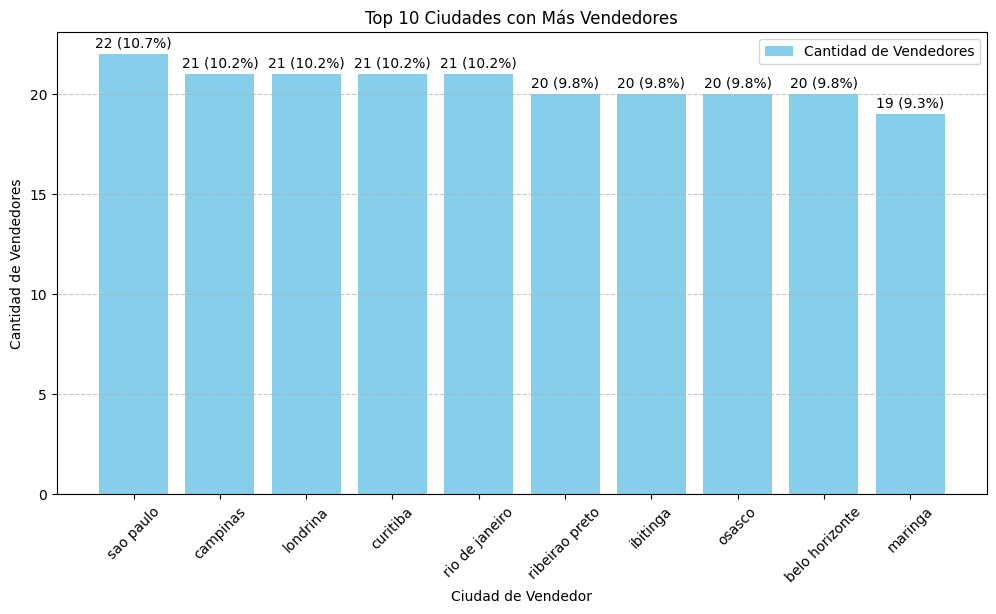

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_cities(top_cities_df):
    # Ordenar las ciudades por cantidad de vendedores (mayor a menor)
    top_cities_df = top_cities_df.sort_values(by="cantidad_vendedores", ascending=False)

    # Grafica los datos
    plt.figure(figsize=(12, 6))
    bar_plot = plt.bar(top_cities_df["seller_city"], top_cities_df["cantidad_vendedores"], color="skyblue")

    # Agrega etiquetas de cantidad y porcentaje en las barras
    total_vendedores = top_cities_df["cantidad_vendedores"].sum()
    for bar in bar_plot:
        height = bar.get_height()
        city = top_cities_df[top_cities_df["cantidad_vendedores"] == height]["seller_city"].values[0]
        percentage = (height / total_vendedores) * 100
        plt.annotate(f"{int(height)} ({percentage:.1f}%)",
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha="center", va="bottom", fontsize=10)

    plt.title("Top 10 Ciudades con Más Vendedores")
    plt.xlabel("Ciudad de Vendedor")
    plt.ylabel("Cantidad de Vendedores")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(["Cantidad de Vendedores"], loc="upper right")  # Leyenda

    plt.show()

# Convierte el resultado a un DataFrame de Pandas para la visualización
top_10_ciudades_df = top_10_ciudades_vendedores.toPandas()

# Muestra el resultado
print("Top 10 Ciudades con Más Vendedores:")
print(top_10_ciudades_df)

# Grafica los datos
plot_top_cities(top_10_ciudades_df)


Top 10 Ciudades con Más Vendedores:
      seller_city  cantidad_vendedores
0       sao paulo                   22
1        campinas                   21
2        londrina                   21
3        curitiba                   21
4  rio de janeiro                   21
5  ribeirao preto                   20
6        ibitinga                   20
7          osasco                   20
8  belo horizonte                   20
9         maringa                   19


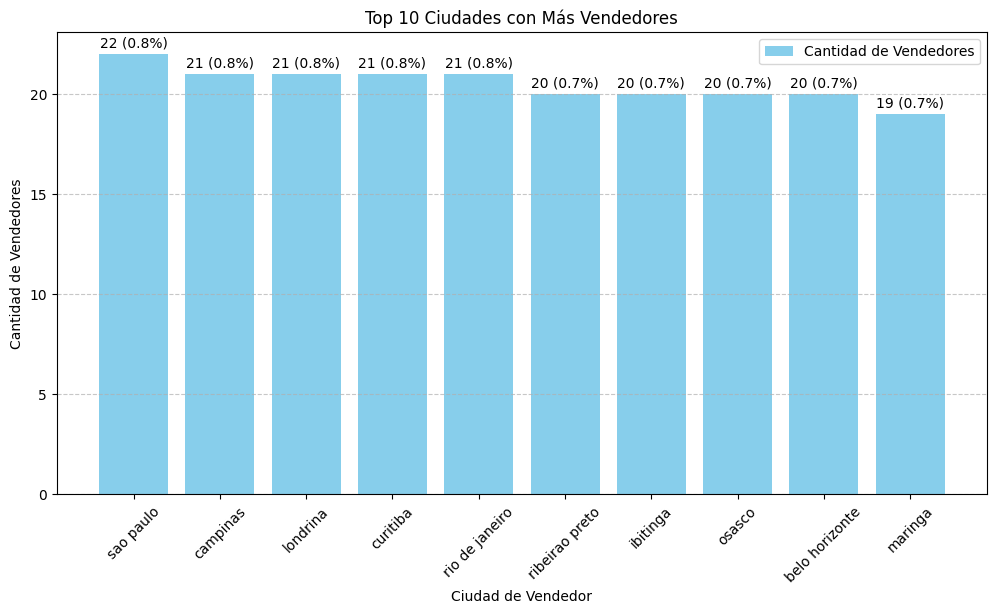

In [121]:
import matplotlib.pyplot as plt

def plot_top_cities(top_cities_df, total_vendedores):
    # Ordenar las ciudades por cantidad de vendedores (mayor a menor)
    top_cities_df = top_cities_df.sort_values(by="cantidad_vendedores", ascending=False)

    # Grafica los datos
    plt.figure(figsize=(12, 6))
    bar_plot = plt.bar(top_cities_df["seller_city"], top_cities_df["cantidad_vendedores"], color="skyblue")

    # Agrega etiquetas de cantidad y porcentaje en las barras
    for bar in bar_plot:
        height = bar.get_height()
        city = top_cities_df[top_cities_df["cantidad_vendedores"] == height]["seller_city"].values[0]
        percentage = (height / total_vendedores) * 100
        plt.annotate(f"{int(height)} ({percentage:.1f}%)",
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha="center", va="bottom", fontsize=10)

    plt.title("Top 10 Ciudades con Más Vendedores")
    plt.xlabel("Ciudad de Vendedor")
    plt.ylabel("Cantidad de Vendedores")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(["Cantidad de Vendedores"], loc="upper right")  # Leyenda

    plt.show()

# Convierte el resultado a un DataFrame de Pandas para la visualización
top_10_ciudades_df = top_10_ciudades_vendedores.toPandas()
vendedores_por_ciudad_df = vendedores_por_ciudad.toPandas()

# Calcula el total de vendedores fuera de la función y pásalo como argumento
total_vendedores = vendedores_por_ciudad_df["cantidad_vendedores"].sum()

# Muestra el resultado
print("Top 10 Ciudades con Más Vendedores:")
print(top_10_ciudades_df)

# Grafica los datos
plot_top_cities(top_10_ciudades_df, total_vendedores)


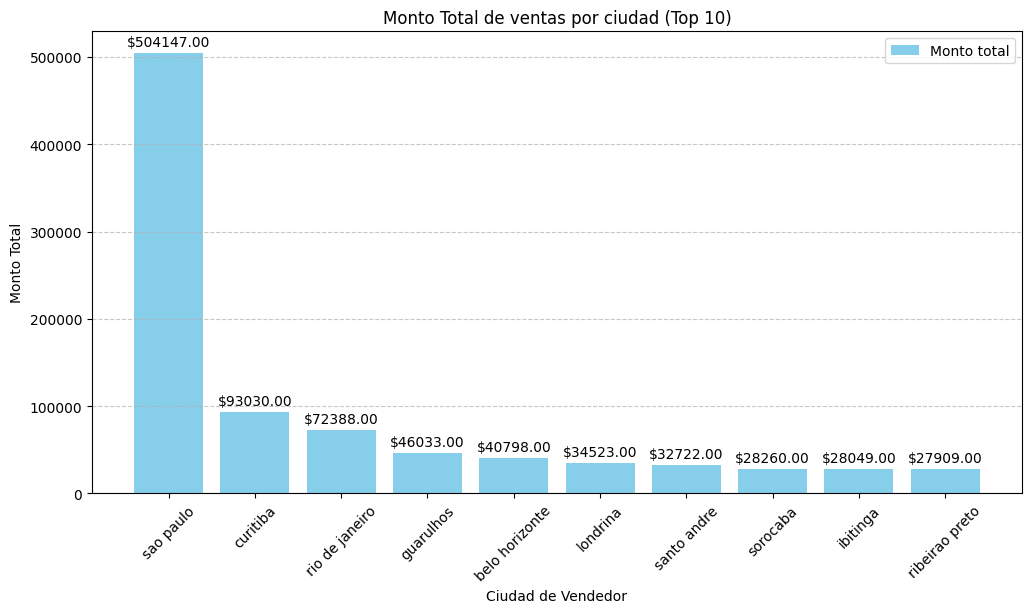

In [122]:
# Agrupar los datos por seller_city y calcular la suma del precio_total
precio_total_por_ciudad = resultado_70.groupby('seller_city').agg(F.sum('Precio_total').alias('Precio_total')).toPandas()

# Ordenar el DataFrame por precio_total de manera descendente y tomar el Top 10
precio_total_por_ciudad = precio_total_por_ciudad.sort_values(by='Precio_total', ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(precio_total_por_ciudad['seller_city'], precio_total_por_ciudad['Precio_total'], color='skyblue')

# Agregar etiquetas de datos en las barras (precio)
for bar in bar_plot:
    height = bar.get_height()
    plt.annotate(f"${height:.2f}",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha="center", va="bottom", fontsize=10)

# Configuración adicional
plt.title("Monto Total de ventas por ciudad (Top 10)")
plt.xlabel("Ciudad de Vendedor")
plt.ylabel("Monto Total")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(["Monto total"], loc="upper right")

plt.show()



## BBT1-71 Querys en spark SQL, análisis D

COMO: desarrollador
QUIERO: Generar una consulta que cumpla los siguientes puntos:
Totalizar por las órdenes más vendidas por categoria, por año y mes limite de entrega sumando monto de envio y promedio de monto de envio.

PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y la incidencia de los envios por categoria de los productos.

In [123]:
from pyspark.sql.functions import year, month
from pyspark.sql.window import Window
from pyspark.sql.functions import sum, avg, row_number

In [124]:
spark = SparkSession.builder.appName("ConsultaSparkSQL").getOrCreate()

Dado que dicha consulta proviene de un filtrado de tres datos por categoria, la frecuencia de compra iba a dar una sola unidad mensual, por lo cual se realizó el filtro solamente por año.

In [137]:
analisis_D = spark.sql("""
    SELECT
        product_category_name,
        year,
        ROUND(SUM(freight_value),2) AS total_monto_envio,
        ROUND(AVG(freight_value),2) AS promedio_monto_envio,
        count(freight_value) AS cant_envios
    FROM
        Vista_D
    GROUP BY
        product_category_name, year
    ORDER BY total_monto_envio DESC
    LIMIT 20
""")

analisis_D.show()

+---------------------+----+-----------------+--------------------+-----------+
|product_category_name|year|total_monto_envio|promedio_monto_envio|cant_envios|
+---------------------+----+-----------------+--------------------+-----------+
| utilidades_domest...|2018|           750.56|              375.28|          2|
|                bebes|2018|            538.0|              179.33|          3|
|        esporte_lazer|2018|           493.66|              164.55|          3|
|      cama_mesa_banho|2018|            476.7|               158.9|          3|
|          eletronicos|2018|           428.42|              142.81|          3|
|      eletroportateis|2017|           421.44|              140.48|          3|
| agro_industria_e_...|2017|           379.71|              126.57|          3|
| industria_comerci...|2018|           360.14|              180.07|          2|
|     eletrodomesticos|2018|           348.45|              116.15|          3|
|             pet_shop|2017|           3

## BBT1-72 Querys en spark SQL, análisis E

Descripción

COMO: desarrollador
QUIERO: Generar una consulta que cumpla los siguientes puntos:
Totalizar por las órdenes más vendidas por método de pago, por año y mes sumando monto y promedio de compra..

PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y la incidencia de los métodos de pago.

In [133]:
analisis_E = spark.sql("""
    SELECT
        payment_type,
        year_month,
        ROUND(SUM(payment_value),2) AS total_ingresos,
        ROUND(AVG(payment_value),2) AS promedio_ingresos,
        count(payment_type) as cant_transacciones
    FROM
        Vista_E
    WHERE payment_type = 'credit_card' OR payment_type = 'boleto'
          OR payment_type = 'debit_card' OR payment_type = 'voucher'
    GROUP BY
        payment_type, year_month
    ORDER BY year_month ASC
    limit 10
""")

analisis_E.show()

+------------+----------+--------------+-----------------+------------------+
|payment_type|year_month|total_ingresos|promedio_ingresos|cant_transacciones|
+------------+----------+--------------+-----------------+------------------+
| credit_card|   2016-09|        252.24|            84.08|                 3|
|      boleto|   2016-10|       9679.06|           153.64|                63|
| credit_card|   2016-10|      48290.62|           190.12|               254|
|  debit_card|   2016-10|        241.73|           120.87|                 2|
|     voucher|   2016-10|        879.07|            38.22|                23|
| credit_card|   2016-12|         19.62|            19.62|                 1|
|      boleto|   2017-01|      24074.43|           122.21|               197|
|  debit_card|   2017-01|        743.53|            82.61|                 9|
| credit_card|   2017-01|     109615.68|           188.02|               583|
|     voucher|   2017-01|        4054.4|            66.47|      

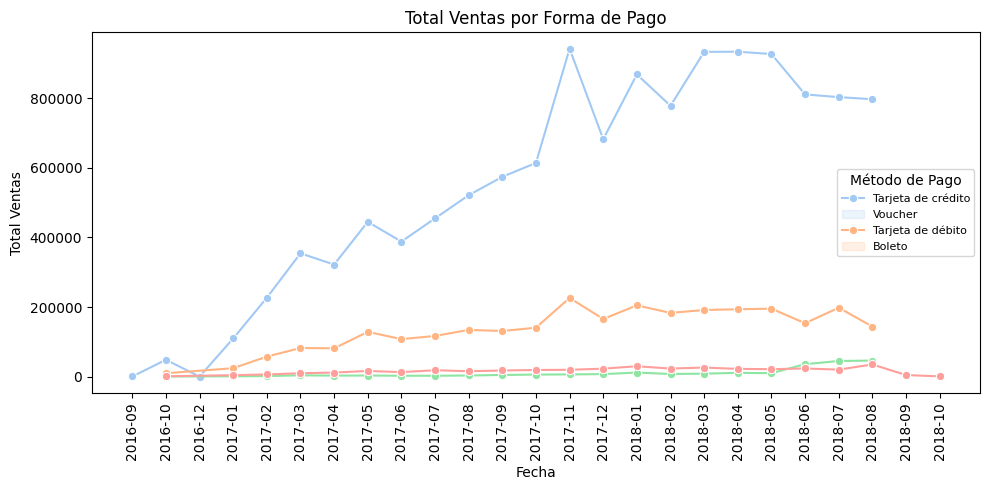

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

payment_type = [row.payment_type for row in analisis_E.collect()]
year_month = [row.year_month for row in analisis_E.collect()]
total_ingresos = [row.total_ingresos for row in analisis_E.collect()]

# Crear un DataFrame a partir de las listas
data = pd.DataFrame({'Fecha': year_month, 'Total Ingresos': total_ingresos, 'Payment Type': payment_type})

# Paleta de colores para el gráfico
palette_color = sns.color_palette('pastel')

# Crear un gráfico de series con Seaborn separando por Payment Type
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Fecha', y='Total Ingresos', hue='Payment Type', palette='pastel', markers=True, marker='o')
plt.xlabel('Fecha')
plt.ylabel('Total Ventas')
plt.title('Total Ventas por Forma de Pago')
plt.xticks(rotation=90)
plt.legend(title='Método de Pago')

# Modificar los nombres de las etiquetas en la leyenda
font = {'size': 8}
etiquetas_personalizadas = ['Tarjeta de crédito', 'Voucher', 'Tarjeta de débito', 'Boleto']
plt.legend(title='Método de Pago', labels=etiquetas_personalizadas, loc='center right', prop=font)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## BBT1-73 Querys en spark SQL, análisis F

COMO: desarrollador.

QUIERO: Generar una consulta que cumpla los siguientes puntos:
Calcular la distancia de los clientes de su vecino mas cercano sacando luego el promedio de distancia por ciudad.

PARA: Enriquecer el análisis de los datos según requerimiento. Para entender la incidencia de las ubicaciones geográficas de los clientes, en este caso se puede llegar a determinar un futuro análisis de cluster de clientes.

Se calculo la distancia a la ciudad más cercana ya que al haber realizado promedios de latitud y longitud anteriormente calcular la distancia de los clientes de su vecino más cercano no era posible.

Como se buscan las ciudades más cercanas, se necesita tener un unico zip_code por ciudad, motivo por el cual se utiliza DISTINCT.

In [157]:
bbt1_73 = spark.sql(
    '''
    SELECT DISTINCT geolocation_zip_code_prefix, promedio_latitud, promedio_longitud ,geolocation_city
    FROM customers_geolocation2
    '''
)
bbt1_73.show(10)

+---------------------------+-------------------+-------------------+----------------+
|geolocation_zip_code_prefix|   promedio_latitud|  promedio_longitud|geolocation_city|
+---------------------------+-------------------+-------------------+----------------+
|                      89188|-27.268552042340644|-49.711969364664384|      agronomica|
|                      62970| -5.519712483344855| -38.26737385532683|      alto santo|
|                      47830|-12.305739641294254|  -44.5388124087167|     baianopolis|
|                      35975|-19.859866222327437| -43.45074764371449| barão de cocais|
|                      89500|  -26.7781945518277| -51.01186246927613|         cacador|
|                      16500|-21.803200599395232| -49.60221269289015|      cafelandia|
|                       7700|-23.362945113345816| -46.74096686271874|        caieiras|
|                      13073| -22.88460270536805| -47.06730188388011|        campinas|
|                      61635| -3.7386204345

Se realiza un groupby y count del código postal para corroborar que tengamos solo 1 por ciudad.

In [158]:
bbt1_73.groupby('geolocation_zip_code_prefix').count().sort('count', ascending=False).show(5)

+---------------------------+-----+
|geolocation_zip_code_prefix|count|
+---------------------------+-----+
|                      76110|    1|
|                       6654|    1|
|                      75705|    1|
|                      65220|    1|
|                      36525|    1|
+---------------------------+-----+
only showing top 5 rows



Se crea una vista temporal de la tabla bbt1_73 para luego poder utilizarla dentro de la consulta spark.sql

In [159]:
#Creación de vista temporal de la tabla bbt1_73
bbt1_73.createOrReplaceTempView('bbt1_73_vt')

In [160]:
#Visualización de la vista temporal
vista_bbt1_73 = spark.sql('SELECT * FROM bbt1_73_vt')
vista_bbt1_73.show(10)

+---------------------------+-------------------+-------------------+----------------+
|geolocation_zip_code_prefix|   promedio_latitud|  promedio_longitud|geolocation_city|
+---------------------------+-------------------+-------------------+----------------+
|                      89188|-27.268552042340644|-49.711969364664384|      agronomica|
|                      62970| -5.519712483344855| -38.26737385532683|      alto santo|
|                      47830|-12.305739641294254|  -44.5388124087167|     baianopolis|
|                      35975|-19.859866222327437| -43.45074764371449| barão de cocais|
|                      89500|  -26.7781945518277| -51.01186246927613|         cacador|
|                      16500|-21.803200599395232| -49.60221269289015|      cafelandia|
|                       7700|-23.362945113345816| -46.74096686271874|        caieiras|
|                      13073| -22.88460270536805| -47.06730188388011|        campinas|
|                      61635| -3.7386204345

In [161]:
query_bbt1_73 = spark.sql(
'''
WITH ranked_distance AS (
    SELECT
        a.geolocation_zip_code_prefix AS zip_code_a, a.promedio_latitud AS promedio_latitud_a, a.promedio_longitud AS promedio_longitud_a, a.geolocation_city AS ciudad,
        b.geolocation_zip_code_prefix AS zip_code_b, b.promedio_latitud AS promedio_latitud_b, b.promedio_longitud AS promedio_longitud_b, b.geolocation_city AS ciudad_mas_cercana,
        SQRT(POW(a.promedio_latitud - b.promedio_latitud, 2) + POW(a.promedio_longitud - b.promedio_longitud, 2)) AS distancia,
        ROW_NUMBER() OVER (PARTITION BY a.geolocation_zip_code_prefix ORDER BY SQRT(POW(a.promedio_latitud - b.promedio_latitud, 2) + POW(a.promedio_longitud - b.promedio_longitud, 2))) AS rank
    FROM bbt1_73_vt a
    CROSS JOIN bbt1_73_vt b
)
SELECT
    zip_code_a,
    promedio_latitud_a,
    promedio_longitud_a,
    ciudad,
    zip_code_b AS zip_code_ciudad_mas_cercana,
    promedio_latitud_b,
    promedio_longitud_b,
    ciudad_mas_cercana,
    distancia AS distancia_mas_cercana
FROM ranked_distance
WHERE rank = 2;
'''
)

In [162]:
query_bbt1_73.show(5)

+----------+-------------------+-------------------+---------------+---------------------------+-------------------+-------------------+------------------+---------------------+
|zip_code_a| promedio_latitud_a|promedio_longitud_a|         ciudad|zip_code_ciudad_mas_cercana| promedio_latitud_b|promedio_longitud_b|ciudad_mas_cercana|distancia_mas_cercana|
+----------+-------------------+-------------------+---------------+---------------------------+-------------------+-------------------+------------------+---------------------+
|      6622|-23.546703359402944| -46.89983624019375|        jandira|                       6631|-23.544998282452386| -46.90430341342511|           jandira| 0.004781519014530466|
|      6654|-23.538905805876308| -46.92410128109349|        itapevi|                       6653|-23.547053538149342| -46.92972088164854|           itapevi|  0.00989774982465045|
|      6773| -23.64222988760007| -46.79178002502203|taboao da serra|                       6775|-23.6367037610

## BBT1-74 Querys en spark SQL, análisis G

COMO: desarrollador.

QUIERO: Generar una consulta que cumpla los siguientes puntos:
Calcular el monto máximo, mínimo y promedio de compra por ciudad, año y mes de compra.

PARA: Enriquecer el análisis de los datos según requerimiento. Para entender el comportamiento de comprar por ciudad a lo largo del tiempo.

Se tranformó el csv de order_payments a un DataFrame de Spark y se creo una vista temporal de la tabla mencionada.

Esto se realizó debido a que se requería la utilización de un join entre orders_geolocation2 y order_payments ya que la tabla temporal ordes_geolocation2 no poseía precios para calcular los montos pedidos en la consigna.

In [163]:
#Creación DataFrame de Spark a partir del cvs de order_payments
order_payments_spark = spark.read.csv('/content/Copia de ecommerce_order_payments_dataset.csv', header=True, inferSchema=True, sep=',')

In [164]:
#Creación de vista temporal de la tabla order_payments
order_payments_spark.createOrReplaceTempView('order_payments')

In [165]:
#Visualización de la vista temporal
vista_order_payments = spark.sql('SELECT * FROM order_payments')
vista_order_payments.show(10)

+--------------------+------------------+------------+--------------------+-------------+
|            order_id|payment_sequential|payment_type|payment_installments|payment_value|
+--------------------+------------------+------------+--------------------+-------------+
|b81ef226f3fe1789b...|                 1| credit_card|                   8|        99.33|
|a9810da82917af2d9...|                 1| credit_card|                   1|        24.39|
|25e8ea4e93396b6fa...|                 1| credit_card|                   1|        65.71|
|ba78997921bbcdc13...|                 1| credit_card|                   8|       107.78|
|42fdf880ba16b47b5...|                 1| credit_card|                   2|       128.45|
|298fcdf1f73eb413e...|                 1| credit_card|                   2|        96.12|
|771ee386b001f0620...|                 1| credit_card|                   1|        81.16|
|3d7239c394a212faa...|                 1| credit_card|                   3|        51.84|
|1f78449c8

In [172]:
bbt1_74 = spark.sql(
    '''
    SELECT o.geolocation_city, YEAR(order_purchase_timestamp) as anio, MONTH(order_purchase_timestamp) as mes, MAX(op.payment_value) as monto_maximo, MIN(op.payment_value) as monto_minimo, AVG(payment_value) as monto_promedio, COUNT(geolocation_city) as cantidad_de_compras
    FROM orders_geolocation2 o
    JOIN order_payments op
    ON o.order_id = op.order_id
    GROUP BY o.geolocation_city, anio, mes
    ORDER BY o.geolocation_city
    '''
)
bbt1_74.show()

+-------------------+----+---+------------+------------+--------------+-------------------+
|   geolocation_city|anio|mes|monto_maximo|monto_minimo|monto_promedio|cantidad_de_compras|
+-------------------+----+---+------------+------------+--------------+-------------------+
|abadia dos dourados|2018|  3|      219.63|      219.63|        219.63|                  1|
|abadia dos dourados|2018|  7|       58.28|       58.28|         58.28|                  1|
|abadia dos dourados|2017|  9|      135.59|      135.59|        135.59|                  1|
|          abadiania|2018|  1|     1025.52|     1025.52|       1025.52|                  1|
|             abaete|2017|  8|      466.89|      466.89|        466.89|                  1|
|             abaete|2017|  7|      206.07|        82.7|       144.385|                  2|
|             abaete|2018|  8|      109.39|      109.39|        109.39|                  1|
|             abaete|2018|  6|       240.6|       148.0|         194.3|         

Se agrego la columna llamada 'cantidad_de_compras' porque al analizar el resultado de la query inicial, se observó que algunas ciudades en determinado año y mes presentaban el mismo valor de monto máximo, mínimo y promedio, por lo tanto, se supuso que habia sido realizada una sola compra. Efectivamente, con la columna nueva, se pudo corroborar la presunción: que haya filas donde el monto máximo, mínimo y promedio es igual se debe a que en esa fecha y esa ciudad se realizó una única compra.

## BBT1-75 - Querys en spark SQL, análisis H

Descripción

COMO: desarrollador
QUIERO: Generar una consulta que cumpla los siguientes puntos: Calcular el puntaje máximo, mínimo, promedio de compra y de las órdenes agrupadas por año, mes.
PARA: Enriquecer el análisis de los datos según requerimiento. Para entender el nivel de satisfacción de los compradores respecto al consumo mensual en promedio.

In [138]:
query_spark_bbt1_75 = '''
    SELECT
        YEAR(shipping_limit_date) AS year,
        MONTH(shipping_limit_date) AS month,
        MAX(total_price) AS max_price,
        MIN(total_price) AS min_price,
        AVG(total_price) AS avg_price
    FROM df_analysis_h
    GROUP BY 1, 2
    ORDER BY 1 DESC, 2 DESC
;
'''

bbt1_75_spark = sqlContext.sql(query_spark_bbt1_75)

In [139]:
bbt1_75_spark.show(10)

+----+-----+---------+---------+------------------+
|year|month|max_price|min_price|         avg_price|
+----+-----+---------+---------+------------------+
|2020|    4|   199.98|   199.98|            199.98|
|2018|    9|   2299.0|      6.9|191.93549295774645|
|2018|    8|  4399.87|      2.2|   133.58644031142|
|2018|    7|   3089.0|      3.0|131.12004005340506|
|2018|    6|   4590.0|      3.5|142.30326728972028|
|2018|    5|   3930.0|     0.85|140.13866616541472|
|2018|    4|  4099.99|     4.99| 140.9586136685558|
|2018|    3|   3700.0|     4.99|128.35428046861426|
|2018|    2|   3690.0|     2.99|122.25218257733947|
|2018|    1|   2110.0|      5.2|121.22936877667188|
+----+-----+---------+---------+------------------+
only showing top 10 rows



In [140]:
from matplotlib import pyplot as plt

In [141]:
bbt1_75_pandas = bbt1_75_spark.toPandas()
bbt1_75_pandas.head(1)

,year,month,max_price,min_price,avg_price
0,2020,4,199.98,199.98,199.98


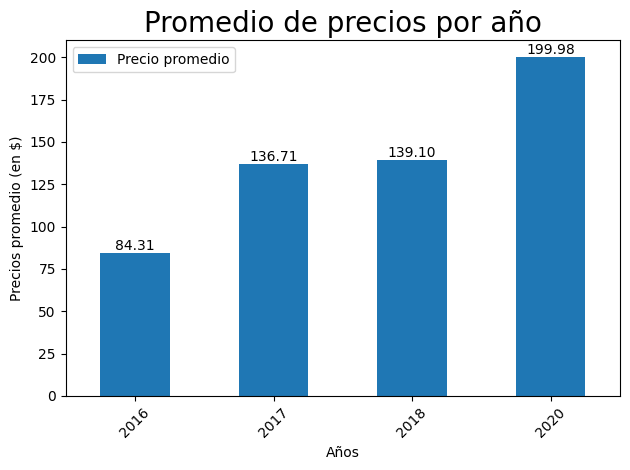

<Figure size 640x480 with 0 Axes>

In [142]:
# Tu código para crear el gráfico de barras
ax = bbt1_75_pandas[['year', 'avg_price']].groupby('year').mean().plot(kind='bar')
plt.title('Promedio de precios por año', fontsize=20)
plt.ylabel('Precios promedio (en $)')
plt.xlabel('Años')
plt.xticks(rotation=45)
plt.tight_layout()

# Agrega etiquetas de valor sobre las barras
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', fontsize=10, color='black')

# Modificamos el texto de la leyenda y su posición
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Precio promedio']
plt.legend(handles, new_labels, loc='upper left')

# Mostramos el gráfico
plt.show()
plt.savefig('grafico_de_barra.png')

## BBT1-76 - Querys en spark SQL, análisis I

Descripción

COMO: desarrollador
QUIERO: Generar una consulta que cumpla los siguientes puntos: Calcular el maximo monto mensual por categoria de producto y estado de envío, agrupado por año y mes de envio.
PARA: Enriquecer el análisis de los datos según requerimiento. Para entender el comportamiento de compra de los productos y su estado de envío mensual.

In [143]:
query_bbt1_76 = '''
    SELECT
        YEAR(dj.order_delivered_carrier_date) AS year,
        MONTH(dj.order_delivered_carrier_date) AS month,
        di.product_category_name_english,
        dj.order_status,
        MAX(dh.total_price) AS max_monthly_price
    FROM
        df_analysis_h AS dh
    JOIN
        df_analysis_i AS di
            ON dh.order_id = di.order_id
    JOIN
        df_analysis_j AS dj
        ON dh.order_id = dj.order_id
    GROUP BY
        1, 2, 3, 4
    ORDER BY
        3 ASC, 1 DESC, 2 ASC
    ;
'''

bbt1_76_spark = spark.sql(query_bbt1_76)

bbt1_76_spark.show(10)

+----+-----+-----------------------------+------------+-----------------+
|year|month|product_category_name_english|order_status|max_monthly_price|
+----+-----+-----------------------------+------------+-----------------+
|2018|    1|         agro_industry_and...|   delivered|           934.94|
|2018|    2|         agro_industry_and...|   delivered|            824.0|
|2018|    3|         agro_industry_and...|   delivered|            940.5|
|2018|    4|         agro_industry_and...|   delivered|            465.0|
|2018|    5|         agro_industry_and...|   delivered|           1180.0|
|2018|    6|         agro_industry_and...|   delivered|           1234.0|
|2018|    7|         agro_industry_and...|   delivered|            940.5|
|2018|    8|         agro_industry_and...|   delivered|           1899.0|
|2017|    5|         agro_industry_and...|   delivered|           869.97|
|2017|    7|         agro_industry_and...|   delivered|           1180.0|
+----+-----+--------------------------

In [144]:
bbt1_76_pandas = bbt1_76_spark.toPandas()

In [145]:
# Use matplotlib to plot the results of bbt1_76_pandas as a pie chart of order_status

bbt1_76_pandas[['year', 'order_status']].groupby(['year']).value_counts().to_frame()

0
year   order_status     
2016.0 delivered      22
2017.0 delivered     488
       shipped        32
2018.0 delivered     401
       shipped        31
       canceled        3

In [146]:
bbt1_76_pandas[['order_status']].value_counts().head(3)

order_status
delivered       913
shipped          63
canceled         14
dtype: int64

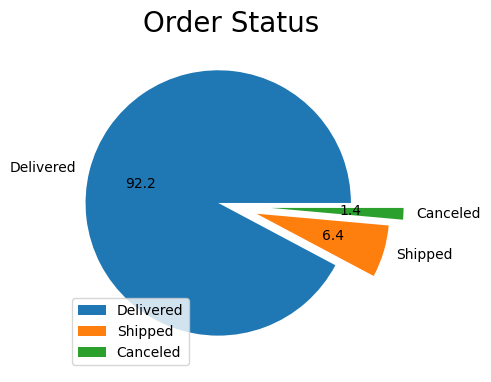

In [147]:
bbt1_76_pandas[['order_status']].value_counts().head(3).plot( \
    kind='pie',
    autopct='%.1f',
    figsize=(5, 5),
    legend=True,
    title='Order Status',
    explode=(0.1, 0.2, 0.3),
    labels=['Delivered', 'Shipped', 'Canceled'],
    labeldistance=1.1,
    fontsize=10,
    ylabel='')

plt.title('Order Status', fontsize=20)
plt.tight_layout()
plt.legend(loc='lower left', fontsize=10)
plt.show()

In [148]:
plt.savefig('grafico_de_torta.png')

<Figure size 640x480 with 0 Axes>

## BBT1-77 - Querys en spark SQL, análisis J

Descripción

COMO: desarrollador
QUIERO: Generar una consulta que cumpla los siguientes puntos: Calcular el momto máximo de compra por ciudad, agrupando tambien por mes y año.
PARA: Enriquecer el análisis de los datos según requerimiento. Para entender variabilidad de preferencias de compra de los clientes por ciudad, mes a mes segun el medio de pago con tarjeta de crédito.

In [149]:
query_bbt1_77 = '''
    SELECT
        j.customer_city,
        EXTRACT(YEAR FROM j.order_delivered_carrier_date) AS year,
        EXTRACT(MONTH FROM j.order_delivered_carrier_date) AS month,
        MAX(h.total_price) AS max_purchase_amount
    FROM
        df_analysis_j AS j
    JOIN
    df_analysis_h AS h
        ON j.order_id = h.order_id
    GROUP BY
        1, 2, 3
    ORDER BY
        1 ASC, 2 ASC, 3 ASC
;
'''
bbt1_77_spark = spark.sql(query_bbt1_77)

bbt1_77_spark.show(10)

+-------------------+----+-----+-------------------+
|      customer_city|year|month|max_purchase_amount|
+-------------------+----+-----+-------------------+
|abadia dos dourados|2018|    3|              199.0|
|          abadiania|2018|    2|             949.99|
|             abaete|2017|    5|              208.9|
|             abaete|2017|    7|             189.99|
|             abaete|2017|    9|              449.0|
|             abaete|2018|    6|              225.9|
|         abaetetuba|2017|    4|             255.61|
|         abaetetuba|2017|   12|             580.27|
|         abaetetuba|2018|    3|               70.8|
|         abaetetuba|2018|    5|              797.6|
+-------------------+----+-----+-------------------+
only showing top 10 rows



## BBT1 - 78 Carga de datos, generacion de archivos .parquet de análisis A

**Descripción**

COMO: desarrollador

QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_A, XXXXXXX.

PARA: Dar acceso a los datos a otros interesados.

In [195]:
ruta_guardado = 'Results_Parquets/Analysis_A/BBT1_78'
resultado_bbt1_68.write.parquet(ruta_guardado)
print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets/Analysis_A/BBT1_78


## BBT1 - 79 Carga de datos, generacion de archivos .parquet de análisis B

**Descripción**

COMO: desarrollador

QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_B, XXXXXXX.

PARA: Dar acceso a los datos a otros interesados.

In [151]:
ruta_guardado = 'Results_Parquets/Analysis_B/BBT1_79'
resultado_bbt1_69.write.parquet(ruta_guardado)
print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets/Analysis_B/BBT1_79


## BBT1 - 80 Carga de datos, generacion de archivos .parquet de análisis C

**Descripción**

COMO: desarrollador

QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_C, XXXXXXX.

PARA: Dar acceso a los datos a otros interesados.


In [152]:
ruta_guardado = 'Results_Parquets/Analysis_C/BBT1_80'
resultado_70.write.parquet(ruta_guardado)
print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets/Analysis_C/BBT1_80


## BBT1-81 Carga de datos, generacion de archivos .parquet de análisis D

COMO: desarrollador
QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_D, XXXXXXX.
PARA: Dar acceso a los datos a otros interesados.

In [153]:
ruta_guardado = 'Results_Parquets\Analysis_D/BBT1_71'
analisis_D.write.parquet(ruta_guardado)

print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets\Analysis_D/BBT1_71


## BBT1-82 Carga de datos, generacion de archivos .parquet de análisis E

COMO: desarrollador
QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_E, XXXXXXX.
PARA: Dar acceso a los datos a otros interesados.

In [154]:
ruta_guardado = 'Results_Parquets\Analysis_E/BBT1_72'
analisis_E.write.parquet(ruta_guardado)

print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets\Analysis_E/BBT1_72


## BBT1-83 Carga de datos, generación de archivos .parquet de análisis F

COMO: desarrollador.

QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_F, XXXXXXX.

PARA: Dar acceso a los datos a otros interesados.

In [168]:
ruta_guardado = 'Results_Parquets\Analysis_F/BBT1_73'
query_bbt1_73.write.parquet(ruta_guardado)

print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets\Analysis_F/BBT1_73


## BBT1-84 Carga de datos, generación de archivos .parquet de análisis G

COMO: desarrollador.

QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_G, XXXXXXX.

PARA: Dar acceso a los datos a otros interesados.

In [197]:
ruta_guardado = 'Results_Parquets\Analysis_G/BBT1_74'
bbt1_74.write.mode('overwrite').parquet(ruta_guardado)
print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets\Analysis_G/BBT1_74


## BBT1-85 - Carga de datos, generacion de archivos .parquet de análisis H

Descripción

COMO: desarrollador
QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_H, XXXXXXX.
PARA: Dar acceso a los datos a otros interesados.

In [198]:
ruta_guardado = 'Results_Parquet/Analysis_H/BBT1_75.parquet'

bbt1_75_spark.write.mode('overwrite').parquet('./Results_Parquet/Analysis_H/BBT1_75.parquet')
print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquet/Analysis_H/BBT1_75.parquet


## BBT1-86 - Carga de datos, generacion de archivos .parquet de análisis I

Descripción

COMO: desarrollador
QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_I, XXXXXXX.
PARA: Dar acceso a los datos a otros interesados.

In [178]:
ruta_guardado = 'Results_Parquet/Analysis_I/BBT1_76.parquet'
bbt1_76_spark.write.parquet('./Results_Parquet/Analysis_I/BBT1_76.parquet')
print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquet/Analysis_I/BBT1_76.parquet


## BBT1-87 - Carga de datos, generacion de archivos .parquet de análisis J

Descripción

COMO: desarrollador
QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_J, XXXXXXX.
PARA: Dar acceso a los datos a otros interesados.

In [179]:
ruta_guardado = 'Results_Parquet/Analysis_J/BBT1_77.parquet'
bbt1_77_spark.write.parquet('./Results_Parquet/Analysis_J/BBT1_77.parquet')
print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquet/Analysis_J/BBT1_77.parquet
